# Preliminary analysis of reshaped convolutional layers

### includes auto MP fits and mp soft ranks

Here, we reshape the CNN layers to give a rectangular matrix

This is a little arbitrary, but we try to create the most rectangular matrix from the CNN layer because that shape will have the most singular values.  

We find that, in doing this, the CNN ESDs may be less fully correlated than the Fully Connected (FC) layers, and will have larger Power Law (PL) exponents $\alpha$

Recall that the Power Law estimator systematically underestimates $\alpha$  for $\alpha>3.5$. Moreover, many of these fits may not be very good anyway since we are not (yet) evaluating the quality metric $D$.

Moreover, while many PL $\alpha$ are large, the tails of the ESD $\rho_{emp}(\lambda)$ may be larger than those for ESDs with even smaller $\alpha$.  This may indicate that we are actually in the _Bulk+Spikes_ regime (the ESD tail are really spikes).  This would be expected for the CNN layers, which may not be fully correlated in every possible way.

In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

import numpy as np
import powerlaw

import sklearn
from sklearn.decomposition import TruncatedSVD

from tqdm import tqdm_notebook as tqdm

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import import_ipynb
import RMT_Util

importing notebook from RMT_Util.ipynb


/Users/charlesmartin14/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charlesmartin14/.local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.2
scipy version 1.0.1
tensforflow version 1.5.0-dev20171116
keras version 2.1.5
sklearn version 0.19.1
powerlaw version 1.4.3


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5,5]

### All Linear Models

In [17]:
def analyze_model(model, plot=True, linear=True, conv2d=False):
    pretrained_model = model(pretrained=True)
    
    model_name = model.__name__
    model_name = model_name.replace("_",' ')
    alphas = []
    soft_ranks = []
    
    for im, m in enumerate(pretrained_model.modules()):
        W = None
        if linear and isinstance(m, nn.Linear):     
            W = np.array(m.weight.data.clone().cpu())
        elif conv2d and isinstance(m, nn.Conv2d):
            W = np.array(m.weight.data.clone().cpu())
            W = RMT_Util.reshape_tensor(W)  
             
        if W is not None:
            M, N = np.min(W.shape), np.max(W.shape)
            Q=N/M 
            
            sv, _ = RMT_Util.singular_spectrum(W)
            evals = sv*sv
            #scaled_evals = (1/N)*evals
            # RMT_Util.fit_power_law
            fit = powerlaw.Fit(evals, xmax=np.max(evals), verbose=False)  
            alpha = fit.alpha
            D = fit.D
            
            dist = RMT_Util.best_dist(fit)
            sigma = RMT_Util.fit_mp(evals, Q)
            mp_soft_rank = RMT_Util.calc_mp_soft_rank(evals,Q,sigma)

                
            if plot:
                RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q, sigma=sigma)
                plt.show()
                
            print("alpha {} sigma {} mp rank {} ".format(alpha, sigma,  mp_soft_rank))

                
            
            #line = "{} & {}& {:.3g} & $({}\\times {})$ & {:.3g} & {:.3g} & {} & {} \\\\ ".format(model_name,im, Q, np.min(W.shape),np.max(W.shape),alpha,D,dist, mp_soft_rank)
            #print(line)
            model_name = " "
            
            alphas.append(alpha)
            soft_ranks.append(mp_soft_rank)
    print("\\hline")
    return alphas, soft_ranks


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions
RMT_Util.ipynb:6: RuntimeWarning: divide by zero encountered in true_divide
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in sqrt
  "source": [
RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Utilility Library"
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Utilility Library"


% spikes outside bulk 0.00
% sigma 0.6866


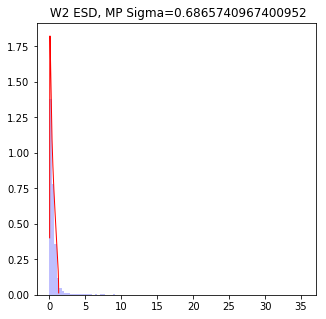

alpha 2.286278269546039 sigma 0.6865740967400952 mp rank 0.03713271309925746 


Assuming nested distributions
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in multiply
  "source": [


% spikes outside bulk 0.00
% sigma 0.5159


RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Utilility Library"


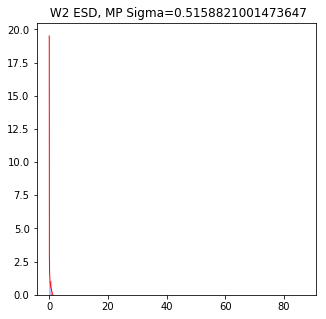

alpha 2.245160450972434 sigma 0.5158821001473647 mp rank 0.012307429723369137 


Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


% spikes outside bulk 0.00
% sigma 0.9867


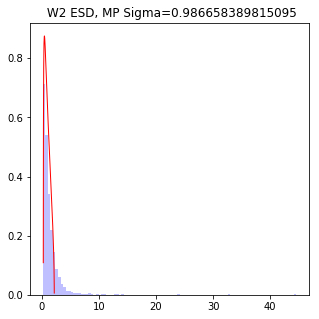

alpha 3.0199817897228702 sigma 0.986658389815095 mp rank 0.04874580342302349 
\hline


In [5]:
for model in [models.alexnet]:
    analyze_model(model, plot=True)

### PoweLaw fit for all FC and CNN layers

In [6]:
all_alphas, all_ranks = [], []
for model in tqdm([models.alexnet, 
              models.densenet121, models.densenet161, models.densenet169, models.densenet201, 
              models.inception_v3,
              models.resnet101, models.resnet152, models.resnet18, models.resnet34, models.resnet50, 
              models.squeezenet1_0, models.squeezenet1_1,
              models.vgg11, models.vgg11_bn,
              models.vgg16, models.vgg16_bn,
              models.vgg19, models.vgg19_bn ]):
    #print(model)
    alphas, soft_ranks = analyze_model(model, plot=False)
    all_alphas.extend(alphas)
    all_ranks.extend(soft_ranks)

/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions
RMT_Util.ipynb:6: RuntimeWarning: divide by zero encountered in true_divide
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in sqrt
  "source": [


alpha 2.286278269546039 sigma 0.6865740967400952 mp rank 0.03713271309925746 


Assuming nested distributions
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in multiply
  "source": [


alpha 2.245160450972434 sigma 0.5158821001473647 mp rank 0.012307429723369137 


Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


alpha 3.0199817897228702 sigma 0.986658389815095 mp rank 0.04874580342302349 
\hline


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
Assuming nested distributions


alpha 3.3222948545521382 sigma 1.6220547141496167 mp rank 0.1685212608989894 
\hline


Assuming nested distributions


alpha 3.4531732545080325 sigma 1.0300629882085446 mp rank 0.05063773578143602 
\hline


Assuming nested distributions


alpha 3.3831088389422694 sigma 0.9621900624577479 mp rank 0.05150159560956937 
\hline


Assuming nested distributions


alpha 3.4136167478422115 sigma 1.144584530969147 mp rank 0.07283760573971385 
\hline


Assuming nested distributions


alpha 5.257276380151478 sigma 1.1335572898083057 mp rank 0.21625947919372446 


Assuming nested distributions


alpha 4.483070075919711 sigma 1.0237144049492133 mp rank 0.10178454898615297 
\hline


Assuming nested distributions


alpha 3.5688013269930767 sigma 0.7838620054139899 mp rank 0.03555612747436763 
\hline


Assuming nested distributions


alpha 3.524599944214767 sigma 0.7757963051994227 mp rank 0.03562439846539902 
\hline


Assuming nested distributions


alpha 3.343847047412278 sigma 1.2406070659994182 mp rank 0.06344157821321782 
\hline


Assuming nested distributions


alpha 3.3896786102854928 sigma 1.1806807266734338 mp rank 0.07059746601374663 
\hline


Assuming nested distributions


alpha 3.5424379598110987 sigma 0.8143412760272158 mp rank 0.03347643331154795 
\hline
\hline
\hline


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
Assuming nested distributions


alpha 2.3224915889387407 sigma 0.9460756532869197 mp rank 0.05072752722327532 


Assuming nested distributions


alpha 2.1675134378365306 sigma 0.4344107628534245 mp rank 0.01252272830998544 


Assuming nested distributions


alpha 2.8256511096963273 sigma 0.96308996246535 mp rank 0.03522217897156668 
\hline


Assuming nested distributions


alpha 2.0710109668010235 sigma 0.9769937152117312 mp rank 0.07364836684443607 


Assuming nested distributions


alpha 1.9503550355586508 sigma 0.3663221723644156 mp rank 0.010320858149789105 


Assuming nested distributions


alpha 2.9946997499696826 sigma 0.9744219348270933 mp rank 0.035215250996121425 
\hline


Assuming nested distributions


alpha 2.2954698302556795 sigma 0.9845573166790381 mp rank 0.06211508554520941 


Assuming nested distributions


alpha 2.1836781970841264 sigma 0.4252958501271239 mp rank 0.014412379410048661 


Assuming nested distributions


alpha 2.092979394801931 sigma 0.9255121295473199 mp rank 0.03524701582615301 
\hline


Assuming nested distributions


alpha 2.0518313078370376 sigma 1.018132174427431 mp rank 0.10057359764407488 


Assuming nested distributions


alpha 1.9682980985916754 sigma 0.3510460730330407 mp rank 0.011450562435183997 


Assuming nested distributions


alpha 3.0313655962309047 sigma 0.9164185542924335 mp rank 0.035374618094155305 
\hline


Assuming nested distributions


alpha 2.269764455025865 sigma 0.9917916599437895 mp rank 0.07360570898589922 


Assuming nested distributions


alpha 2.1879224692679964 sigma 0.41250349137386716 mp rank 0.015537102901136031 


Assuming nested distributions


alpha 2.069911746770846 sigma 0.9140890242768539 mp rank 0.03525518700120068 
\hline


Assuming nested distributions


alpha 2.0418542407294544 sigma 1.005418524711493 mp rank 0.10700308812051332 


Assuming nested distributions


alpha 1.981578047676232 sigma 0.3591021995626128 mp rank 0.013375133304384088 


Assuming nested distributions


alpha 3.031094005348507 sigma 0.90007647473284 mp rank 0.03526564452611067 
\hline



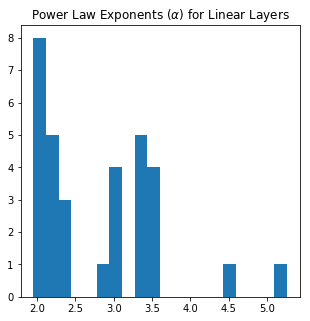

In [23]:
plt.hist(all_alphas,bins=20);
plt.title(r"Power Law Exponents ($\alpha$) for Linear Layers")
plt.show()

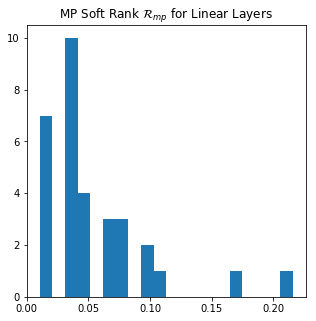

In [25]:
plt.hist(all_ranks,bins=20);
plt.title(r"MP Soft Rank $\mathcal{R}_{mp}$ for Linear Layers")
plt.show()

### CNN  Layers

Use method :  W = RMT_Util.reshape_tensor(W)

#### Preliminary analysis...

### Example: AlexNet

(64, 3, 11, 11)
(64, 363)


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions
RMT_Util.ipynb:6: RuntimeWarning: divide by zero encountered in true_divide
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in sqrt
  "source": [


% spikes outside bulk 0.00
% sigma 1.7178


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Utilility Library"
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Utilility Library"


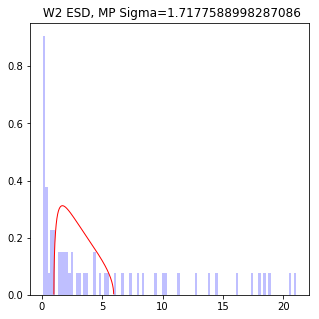

alpha 1.7667030990398187 sigma 1.7177588998287086 mp rank 0.28204320997783805 
(192, 64, 5, 5)
(192, 1600)


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 1.0089


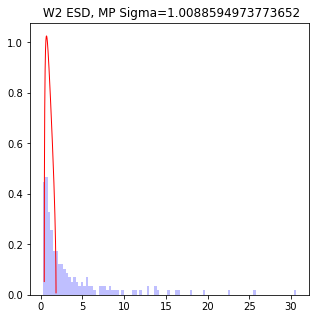

alpha 4.084177383141501 sigma 1.0088594973773652 mp rank 0.06020537006061479 
(384, 192, 3, 3)
(384, 1728)


Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


% spikes outside bulk 0.00
% sigma 1.0022


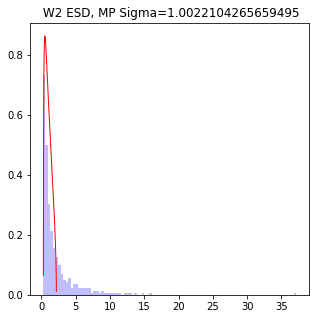

alpha 4.1047004916491705 sigma 1.0022104265659495 mp rank 0.058449932616421355 
(256, 384, 3, 3)
(384, 2304)


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 1.0682


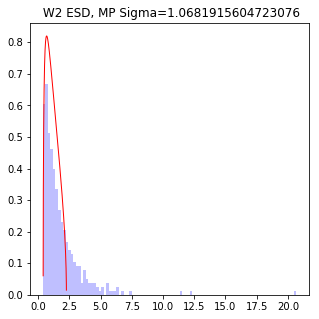

alpha 3.7337944293688214 sigma 1.0681915604723076 mp rank 0.1094045632561717 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


% spikes outside bulk 0.00
% sigma 0.9883


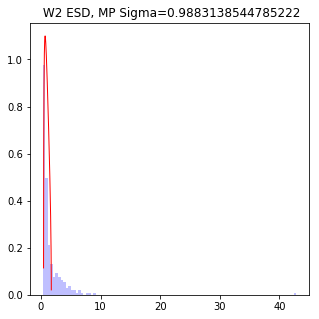

alpha 3.3437381135427002 sigma 0.9883138544785222 mp rank 0.04053602995707654 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.6866


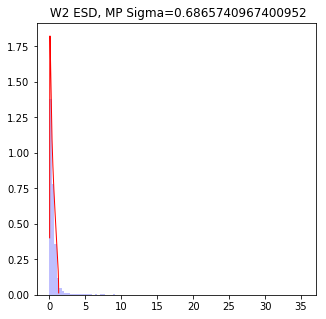

alpha 2.286278269546039 sigma 0.6865740967400952 mp rank 0.03713271309925746 


Assuming nested distributions
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in multiply
  "source": [


% spikes outside bulk 0.00
% sigma 0.5159


RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Utilility Library"


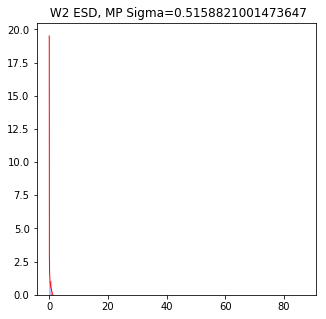

alpha 2.245160450972434 sigma 0.5158821001473647 mp rank 0.012307429723369137 


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


% spikes outside bulk 0.00
% sigma 0.9867


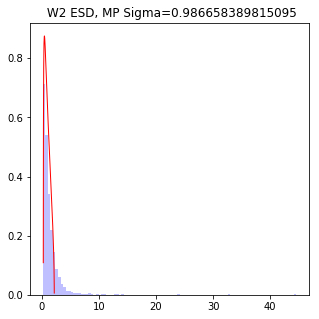

alpha 3.0199817897228702 sigma 0.986658389815095 mp rank 0.04874580342302349 
\hline


In [18]:
for model in [models.alexnet]:
    analyze_model(model, plot=True, conv2d=True)

In [19]:
conv2d_alphas, conv2d_ranks = [], []
for model in tqdm([models.alexnet, 
              models.densenet121, models.densenet161, models.densenet169, models.densenet201, 
              models.inception_v3,
              models.resnet101, models.resnet152, models.resnet18, models.resnet34, models.resnet50, 
              models.squeezenet1_0, models.squeezenet1_1,
              models.vgg11, models.vgg11_bn,
              models.vgg16, models.vgg16_bn,
              models.vgg19, models.vgg19_bn ]):
    #print(model)
    alphas, soft_ranks = analyze_model(model, plot=False, linear=False, conv2d=True)
    conv2d_alphas.extend(alphas)
    conv2d_ranks.extend(soft_ranks)

(64, 3, 11, 11)
(64, 363)


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions
RMT_Util.ipynb:6: RuntimeWarning: divide by zero encountered in true_divide
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in sqrt
  "source": [


alpha 1.7667030990398187 sigma 1.7177588998287086 mp rank 0.28204320997783805 
(192, 64, 5, 5)
(192, 1600)


Assuming nested distributions


alpha 4.084177383141501 sigma 1.0088594973773652 mp rank 0.06020537006061479 
(384, 192, 3, 3)
(384, 1728)


Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


alpha 4.1047004916491705 sigma 1.0022104265659495 mp rank 0.058449932616421355 
(256, 384, 3, 3)
(384, 2304)


Assuming nested distributions


alpha 3.7337944293688214 sigma 1.0681915604723076 mp rank 0.1094045632561717 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.3437381135427002 sigma 0.9883138544785222 mp rank 0.04053602995707654 
\hline


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


(64, 3, 7, 7)
(64, 147)


Assuming nested distributions
Assuming nested distributions

alpha 1.22590019009738 sigma 2.7702871916720295 mp rank 1.3515866722744216 
(128, 64, 1, 1)
(128, 64)
alpha 1.36684623787675 sigma 0.992192056246186 mp rank 1.3949685766787983 
(32, 128, 3, 3)
(128, 288)



Assuming nested distributions


alpha 4.732993952594697 sigma 0.9985318367992921 mp rank 1.4134870083607378 
(128, 96, 1, 1)
(128, 96)


Assuming nested distributions


alpha 1.4743413250345268 sigma 0.5193484798554007 mp rank 0.38908794485525583 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.244285807759078 sigma 0.9934666602677936 mp rank 1.224552759057362 
(128, 128, 1, 1)
(128, 128)


Assuming nested distributions
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in multiply
  "source": [


alpha 2.652968849723056 sigma 0.6126022824544443 mp rank 0.8558923821752796 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.824769094668677 sigma 0.9934849745487121 mp rank 2.1638109539717822 
(128, 160, 1, 1)
(160, 128)


Assuming nested distributions


alpha 7.855811298609453 sigma 0.5677708084768295 mp rank 1.1395907403277488 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.58799756633484 sigma 0.5678531992776044 mp rank 0.7948270181616883 
(128, 192, 1, 1)
(192, 128)


Assuming nested distributions


alpha 3.1772789105056813 sigma 0.4648878542997304 mp rank 0.6477501446349515 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.9228594991735415 sigma 0.996934584544447 mp rank 3.019333147814503 
(128, 224, 1, 1)
(224, 128)


Assuming nested distributions


alpha 7.42653752582049 sigma 0.5680886608856314 mp rank 0.9042027302524019 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.8911520111224216 sigma 0.9933927202210919 mp rank 1.8377520725116812 
(128, 256, 1, 1)
(256, 128)


Assuming nested distributions


alpha 3.5629500614315353 sigma 0.940504590156306 mp rank 0.4033119002029936 
(128, 128, 1, 1)
(128, 128)


Assuming nested distributions


alpha 1.4750180013793583 sigma 0.5021923710984703 mp rank 0.9669138182587694 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.987103809387295 sigma 0.9922028509653756 mp rank 0.9381656563656201 
(128, 160, 1, 1)
(160, 128)


Assuming nested distributions


alpha 2.553262707908802 sigma 0.4545010980232179 mp rank 1.0969846121380242 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.802181797834558 sigma 0.9962505208225043 mp rank 2.159087367189169 
(128, 192, 1, 1)
(192, 128)


Assuming nested distributions


alpha 4.703940061710252 sigma 0.46037408810534036 mp rank 0.8924015091794274 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.409114046602664 sigma 0.9991431930442225 mp rank 2.154210219200467 
(128, 224, 1, 1)
(224, 128)


Assuming nested distributions


alpha 4.792532091226162 sigma 0.4980915751758277 mp rank 0.6707185407386045 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.80819779685262 sigma 0.9961675018376471 mp rank 2.0635051213562052 
(128, 256, 1, 1)
(256, 128)


Assuming nested distributions


alpha 6.821136814424826 sigma 0.9910492087107713 mp rank 2.088463503837534 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.647737744512545 sigma 0.9931684916628207 mp rank 2.5748487065962578 
(128, 288, 1, 1)
(288, 128)


Assuming nested distributions


alpha 5.937695872190056 sigma 0.9971526898701221 mp rank 3.328713895955814 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.8991259312818394 sigma 0.9942954492664687 mp rank 2.2113407511749865 
(128, 320, 1, 1)
(320, 128)


Assuming nested distributions


alpha 4.255122280816221 sigma 0.998606113276437 mp rank 2.7148304741677918 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.5563313597324777 sigma 0.9981927773650983 mp rank 3.1362948540370437 
(128, 352, 1, 1)
(352, 128)


Assuming nested distributions


alpha 6.451188247689648 sigma 0.9961432821399638 mp rank 2.970363402683075 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 6.2692312033329625 sigma 0.9953101864091688 mp rank 2.623869060021472 
(128, 384, 1, 1)
(384, 128)


Assuming nested distributions


alpha 3.515075241911797 sigma 0.9952438076963442 mp rank 1.4183921708281952 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.332370888698604 sigma 0.9991612724248411 mp rank 2.507346608855705 
(128, 416, 1, 1)
(416, 128)


Assuming nested distributions


alpha 2.867573130395008 sigma 0.9968333447730374 mp rank 2.4508062660574317 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 8.109629374148756 sigma 0.9937709185273803 mp rank 2.5733832263323317 
(128, 448, 1, 1)
(448, 128)


Assuming nested distributions


alpha 3.0861319343646447 sigma 0.9974654158012728 mp rank 2.4027962788616173 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.9318509077429251 sigma 0.9968415540214259 mp rank 3.0196410817007355 
(128, 480, 1, 1)
(480, 128)


Assuming nested distributions


alpha 5.926791133663411 sigma 0.9932475990937062 mp rank 1.9992190738130418 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 8.20702501685518 sigma 0.9983257097716127 mp rank 2.4049235890606897 
(256, 512, 1, 1)
(512, 256)


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1175: RuntimeWarning: overflow encountered in double_scalars
  return (self.alpha-1) * self.xmin**(self.alpha-1)
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:822: RuntimeWarning: invalid value encountered in multiply
  likelihoods = f*C
Assuming nested distributions


alpha 5.37856000681049 sigma 0.9031340477196738 mp rank 0.6143874872556985 
(128, 256, 1, 1)
(256, 128)


Assuming nested distributions


alpha 2.5038467822310797 sigma 0.9934785413098116 mp rank 3.7723061803158293 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.657763956264792 sigma 0.9977246004421748 mp rank 2.7841347655282402 
(128, 288, 1, 1)
(288, 128)


Assuming nested distributions


alpha 4.813132395969584 sigma 0.9973264936735216 mp rank 4.6581560557269945 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.8106815025819087 sigma 0.9920555429974226 mp rank 2.0699411103204244 
(128, 320, 1, 1)
(320, 128)


Assuming nested distributions


alpha 5.843385571235039 sigma 0.9983243088591687 mp rank 4.408461748392263 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.6991161667656813 sigma 0.9965437459407448 mp rank 2.9611179707926336 
(128, 352, 1, 1)
(352, 128)


Assuming nested distributions


alpha 4.748592489410312 sigma 0.9978126759049686 mp rank 3.6252366276697043 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 16.246584883079016 sigma 0.9968724338057503 mp rank 3.1410119030242254 
(128, 384, 1, 1)
(384, 128)


Assuming nested distributions


alpha 2.2664995216978907 sigma 0.9994194018854935 mp rank 3.102271502058831 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.026754808107329 sigma 0.9969663037856787 mp rank 3.394235901379687 
(128, 416, 1, 1)
(416, 128)


Assuming nested distributions


alpha 4.591901883861469 sigma 0.9978677796295947 mp rank 2.828112367816268 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 10.033967954649862 sigma 0.9975259849513926 mp rank 3.017376787291773 
(128, 448, 1, 1)
(448, 128)


Assuming nested distributions


alpha 3.75649343139882 sigma 0.9980454369111824 mp rank 3.558308818466119 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.283778356572874 sigma 0.9998682779461736 mp rank 2.6125387232062254 
(128, 480, 1, 1)
(480, 128)


Assuming nested distributions


alpha 6.036532609814931 sigma 0.9997489417948225 mp rank 2.856529477825123 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.029739268202184 sigma 0.9988838880688746 mp rank 2.5611171118481493 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 3.2956059200964574 sigma 0.9933268207769257 mp rank 1.8508266290637039 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.14721061228443 sigma 0.995332398270125 mp rank 2.734443924447719 
(128, 544, 1, 1)
(544, 128)


Assuming nested distributions


alpha 3.69069053296996 sigma 0.9997515905189416 mp rank 3.4116330344837382 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 6.312139219239715 sigma 0.9998787985631031 mp rank 3.130318190432397 
(128, 576, 1, 1)
(576, 128)


Assuming nested distributions


alpha 4.794957009376592 sigma 0.9990629661104351 mp rank 2.7566239603389784 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 7.311571165090755 sigma 0.9964073333031305 mp rank 2.5136361242091327 
(128, 608, 1, 1)
(608, 128)


Assuming nested distributions


alpha 4.714063634652347 sigma 0.9998120201008083 mp rank 2.640662010946019 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.6592949865518536 sigma 0.9986102820443873 mp rank 2.725568883187731 
(128, 640, 1, 1)
(640, 128)


Assuming nested distributions


alpha 2.8719910607711805 sigma 0.9995209044508249 mp rank 1.9371033101893533 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 7.943607808308329 sigma 0.9964678238266954 mp rank 2.902664892557097 
(128, 672, 1, 1)
(672, 128)


Assuming nested distributions


alpha 6.01055851392139 sigma 0.9998992611383565 mp rank 2.8092670107020856 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.93524440951745 sigma 0.9997023845870726 mp rank 2.8928298273460356 
(128, 704, 1, 1)
(704, 128)


Assuming nested distributions


alpha 4.576124159305689 sigma 0.9989088304488976 mp rank 2.3582960498183083 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.981500792908545 sigma 0.9988913548870687 mp rank 2.8376833913665958 
(128, 736, 1, 1)
(736, 128)


Assuming nested distributions


alpha 8.214254725492616 sigma 0.9986508597760857 mp rank 2.672046554158945 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.250409539181255 sigma 0.9978425529460868 mp rank 3.3905773678211535 
(128, 768, 1, 1)
(768, 128)


Assuming nested distributions


alpha 4.127909264344701 sigma 0.9895987968938161 mp rank 1.2918244071818195 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.351810786251548 sigma 0.9952838247588158 mp rank 2.309152477319061 
(128, 800, 1, 1)
(800, 128)


Assuming nested distributions


alpha 5.482126853985522 sigma 0.9989846410443826 mp rank 2.235110927805089 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.310381301555231 sigma 0.9980600566787731 mp rank 2.2046575341541996 
(128, 832, 1, 1)
(832, 128)


Assuming nested distributions


alpha 5.983832140900581 sigma 0.9989513503104186 mp rank 1.9284335311251826 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.135356743624173 sigma 0.9964990337962418 mp rank 2.3067932192782603 
(128, 864, 1, 1)
(864, 128)


Assuming nested distributions


alpha 6.791755521884663 sigma 0.9964920939605916 mp rank 2.2790382539961547 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 12.531204804322337 sigma 0.99981005550403 mp rank 3.1305610399462074 
(128, 896, 1, 1)
(896, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 8.61753189052822 sigma 0.7850990117548846 mp rank 0.8874868193970901 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.6217462875016309 sigma 0.99897959933278 mp rank 2.669285546083658 
(128, 928, 1, 1)
(928, 128)


Assuming nested distributions


alpha 4.836331173326801 sigma 0.9968863713645302 mp rank 1.8740251378233432 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.498935954672564 sigma 0.9984509048064271 mp rank 2.2531859468453956 
(128, 960, 1, 1)
(960, 128)


Assuming nested distributions


alpha 9.423691900418243 sigma 0.6696607441674834 mp rank 0.8318600679162097 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 10.008976104425821 sigma 0.9959139691004727 mp rank 3.0227219674972705 
(128, 992, 1, 1)
(992, 128)


Assuming nested distributions


alpha 9.48086862397568 sigma 0.9999376068568836 mp rank 2.0311483987561525 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.58050159858634 sigma 0.998930279387348 mp rank 2.837572943027796 
(512, 1024, 1, 1)
(1024, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.981926233129583 sigma 0.896844249256446 mp rank 0.3274155145202518 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 4.95581113198936 sigma 0.9982218131903099 mp rank 2.1243360216086122 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.008370368598088 sigma 0.9996698038211719 mp rank 2.9512274596946546 
(128, 544, 1, 1)
(544, 128)


Assuming nested distributions


alpha 11.725022599159946 sigma 0.9893083992592506 mp rank 2.2567539245134123 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.3095951659364302 sigma 1.4345353513540073 mp rank 6.4441527068628055 
(128, 576, 1, 1)
(576, 128)


Assuming nested distributions


alpha 8.883758932125069 sigma 0.6200077761421033 mp rank 0.7887984770707435 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 6.240601394881101 sigma 1.0180224603963115 mp rank 2.7678294228405327 
(128, 608, 1, 1)
(608, 128)


Assuming nested distributions


alpha 5.413945582937846 sigma 0.9999811230390506 mp rank 2.176930851886984 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.5260185883527235 sigma 0.9987881203805347 mp rank 2.494290172132499 
(128, 640, 1, 1)
(640, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.787861724190862 sigma 0.8566484574673336 mp rank 1.061460363185843 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2873325361657804 sigma 1.3591945341478564 mp rank 6.8298340688630645 
(128, 672, 1, 1)
(672, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.4016508294922865 sigma 0.8715147894777904 mp rank 0.9378228466932574 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.779067022451518 sigma 1.797697335705485 mp rank 4.783730257107285 
(128, 704, 1, 1)
(704, 128)


Assuming nested distributions


alpha 8.362699937132252 sigma 0.9990433048979861 mp rank 2.2664647133152185 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2780080406432903 sigma 1.424810985015506 mp rank 7.546446030571748 
(128, 736, 1, 1)
(736, 128)


Assuming nested distributions


alpha 5.167987197031026 sigma 0.9998033579079953 mp rank 2.4156429370764423 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.278522352961034 sigma 1.5629307668660288 mp rank 7.782524115689035 
(128, 768, 1, 1)
(768, 128)


Assuming nested distributions


alpha 6.94062198338408 sigma 0.9988098381898022 mp rank 1.773302870940342 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.280710835129288 sigma 1.3467156695594522 mp rank 7.063976133240418 
(128, 800, 1, 1)
(800, 128)


Assuming nested distributions


alpha 9.688310503673744 sigma 0.9997098456898397 mp rank 2.4995597163113934 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2915693811616233 sigma 1.3300553230839778 mp rank 6.894825535525232 
(128, 832, 1, 1)
(832, 128)


Assuming nested distributions


alpha 11.039830729194252 sigma 0.9981317792513 mp rank 2.0260956483555277 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.284030732667423 sigma 1.4859753765020065 mp rank 8.57958237622488 
(128, 864, 1, 1)
(864, 128)


Assuming nested distributions


alpha 7.094509794323157 sigma 0.9989495603830612 mp rank 2.5414729225384405 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2897724311965535 sigma 1.40795203292437 mp rank 7.668907340496758 
(128, 896, 1, 1)
(896, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.760425441475914 sigma 0.8731195041882212 mp rank 1.212798169850805 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2840515792710119 sigma 1.5786155140569724 mp rank 8.838741441216296 
(128, 928, 1, 1)
(928, 128)


Assuming nested distributions


alpha 4.634527156459516 sigma 0.9985141500438653 mp rank 2.3722767305928185 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2985141919115228 sigma 1.3311199723772098 mp rank 6.605602851001214 
(128, 960, 1, 1)
(960, 128)


Assuming nested distributions


alpha 11.520687583169744 sigma 0.998846191022817 mp rank 2.100490422496861 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2849630808140844 sigma 1.5139623991610869 mp rank 8.22040055337641 
(128, 992, 1, 1)
(992, 128)


Assuming nested distributions


alpha 18.002037975185686 sigma 0.9997771397826968 mp rank 2.0532317367119113 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.279053638171622 sigma 1.5043539685817262 mp rank 7.134881535318617 
\hline
(96, 3, 7, 7)
(96, 147)


Assuming nested distributions
Assuming nested distributions


alpha 4.810443965739329 sigma 0.8882688676016437 mp rank 0.1841191432210491 
(192, 96, 1, 1)
(192, 96)
alpha 1.3647284102383384 sigma 0.9988318877936696 mp rank 1.8859908384615982 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.7514908337671873 sigma 0.9916352399367132 mp rank 2.023314568480579 
(192, 144, 1, 1)
(192, 144)


Assuming nested distributions


alpha 1.3985980666975362 sigma 0.42165745600223914 mp rank 0.3658285559495968 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 4.551426723657086 sigma 0.9924059154970388 mp rank 2.2644432809872392 
(192, 192, 1, 1)
(192, 192)


Assuming nested distributions


alpha 2.6651724290658465 sigma 0.5156796950068354 mp rank 0.694397709824137 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 2.9077829500983974 sigma 0.9941364654105511 mp rank 3.276674399651993 
(192, 240, 1, 1)
(240, 192)


Assuming nested distributions


alpha 3.42701097664194 sigma 0.34490637027807464 mp rank 0.5120902171082986 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.4961793037381743 sigma 0.993183557496802 mp rank 2.629242668338717 
(192, 288, 1, 1)
(288, 192)


Assuming nested distributions


alpha 4.882852530983624 sigma 0.4838871836795484 mp rank 0.7184803856391985 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.093355592407364 sigma 0.9951993627710956 mp rank 2.848522676171329 
(192, 336, 1, 1)
(336, 192)


Assuming nested distributions


alpha 6.8566679756533935 sigma 0.9897813086407973 mp rank 3.796722797860831 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.1250302124632006 sigma 0.9950070445035889 mp rank 3.603612769322383 
(192, 384, 1, 1)
(384, 192)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.808977307852461 sigma 0.9701304489139594 mp rank 0.3625184532217524 
(192, 192, 1, 1)
(192, 192)


Assuming nested distributions


alpha 1.5709557353790422 sigma 0.47833848549243596 mp rank 0.8770562391922779 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 5.449660205220335 sigma 0.9984222455966973 mp rank 2.9551556931178373 
(192, 240, 1, 1)
(240, 192)


Assuming nested distributions


alpha 1.6582974144001956 sigma 0.36526766272620453 mp rank 1.6931467378252791 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.3895463556529375 sigma 4.5561796179489775 mp rank 31.934536186497755 
(192, 288, 1, 1)
(288, 192)


Assuming nested distributions


alpha 3.9303215655370813 sigma 0.39882182708425096 mp rank 0.6533951072730279 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 10.26098723837679 sigma 0.9956967580399382 mp rank 3.739302705832105 
(192, 336, 1, 1)
(336, 192)


Assuming nested distributions


alpha 2.617834049851324 sigma 0.37635801679637676 mp rank 1.0209348759738015 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.674786757704864 sigma 0.9997368158578465 mp rank 3.4480041733723072 
(192, 384, 1, 1)
(384, 192)


Assuming nested distributions


alpha 1.5800779406603742 sigma 0.9974569655226571 mp rank 3.067592004854872 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 5.4684507642858735 sigma 0.998386985477721 mp rank 3.6561894122922474 
(192, 432, 1, 1)
(432, 192)


Assuming nested distributions


alpha 2.989857850978562 sigma 0.9951279561715292 mp rank 4.264698637061021 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.870366979702562 sigma 0.9952753089766604 mp rank 2.7910589326741038 
(192, 480, 1, 1)
(480, 192)


Assuming nested distributions


alpha 2.573591663667162 sigma 0.9978414289850214 mp rank 2.6276775772736864 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.329932988879755 sigma 0.9955480897748629 mp rank 3.335197960058574 
(192, 528, 1, 1)
(528, 192)


Assuming nested distributions


alpha 3.823682831716223 sigma 0.9991201981465068 mp rank 5.0553699902838565 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 2.7874220520448096 sigma 0.9968905509213559 mp rank 3.265920121449792 
(192, 576, 1, 1)
(576, 192)


Assuming nested distributions


alpha 1.8487310261211793 sigma 2.9153313425296696 mp rank 20.77834005830249 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.685985902822126 sigma 0.9985110782865892 mp rank 3.2596664497791306 
(192, 624, 1, 1)
(624, 192)


Assuming nested distributions


alpha 3.8765271017880245 sigma 0.9994495575576863 mp rank 4.14211564357819 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.869227807966126 sigma 0.9992350624459798 mp rank 3.791839764841148 
(192, 672, 1, 1)
(672, 192)


Assuming nested distributions


alpha 3.040246799564964 sigma 1.0534593547335551 mp rank 3.386092484815287 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 2.799119758690899 sigma 0.9974512678353255 mp rank 3.872969785479642 
(192, 720, 1, 1)
(720, 192)


Assuming nested distributions


alpha 8.569178774091311 sigma 0.9991323791381613 mp rank 2.9372877084867928 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.646542746096465 sigma 0.9977849449934629 mp rank 2.617685944433657 
(384, 768, 1, 1)
(768, 384)


Assuming nested distributions


alpha 4.340773774784043 sigma 0.9998981987394858 mp rank 0.8138258440027759 
(192, 384, 1, 1)
(384, 192)


Assuming nested distributions


alpha 1.8002852380238985 sigma 0.9964743013352617 mp rank 5.509056229167572 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 4.396740157605661 sigma 0.9974271900232845 mp rank 3.32761024109809 
(192, 432, 1, 1)
(432, 192)


Assuming nested distributions


alpha 6.1319480472009 sigma 0.9968953696532075 mp rank 7.791717928465467 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.1025447466432 sigma 0.9954099043154236 mp rank 4.342259274437323 
(192, 480, 1, 1)
(480, 192)


Assuming nested distributions


alpha 2.335778430546288 sigma 2.6390720480205516 mp rank 42.1474454222703 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.5784044261775754 sigma 3.525746249804339 mp rank 39.21628431835577 
(192, 528, 1, 1)
(528, 192)


Assuming nested distributions


alpha 4.391332466993736 sigma 2.1313812348767236 mp rank 54.23894718346805 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 2.7589892721732587 sigma 0.9970995751464663 mp rank 4.251678007155877 
(192, 576, 1, 1)
(576, 192)


Assuming nested distributions


alpha 3.2774625902415515 sigma 2.3412407061446583 mp rank 28.47093254669216 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.8600113468095802 sigma 0.9974426525707717 mp rank 5.2888841812943195 
(192, 624, 1, 1)
(624, 192)


Assuming nested distributions


alpha 4.209113391082905 sigma 2.0009600651702173 mp rank 32.957207917604514 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 4.135287680255526 sigma 0.9989951081886412 mp rank 4.010988849014476 
(192, 672, 1, 1)
(672, 192)


Assuming nested distributions


alpha 3.4685050993668747 sigma 2.1157743510079876 mp rank 22.461242138846096 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.6007131025776782 sigma 0.9953454916510874 mp rank 4.673855070360308 
(192, 720, 1, 1)
(720, 192)


Assuming nested distributions


alpha 3.8580160779275214 sigma 1.7936597349275138 mp rank 29.381774227853608 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 2.8125196557468373 sigma 0.9994106598771995 mp rank 6.0875249527620525 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions


alpha 5.698892141554477 sigma 2.077935530417543 mp rank 16.77984160184515 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 5.544478362250243 sigma 0.9978748052924162 mp rank 5.09648631888712 
(192, 816, 1, 1)
(816, 192)


Assuming nested distributions


alpha 2.6633006041439886 sigma 1.9580817944481401 mp rank 16.398961651666415 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.675744371394106 sigma 0.9963658392291088 mp rank 3.952064414545441 
(192, 864, 1, 1)
(864, 192)


Assuming nested distributions


alpha 2.5052884364448342 sigma 2.322935767346945 mp rank 11.600728486698987 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 4.261378698445663 sigma 0.9961392807307847 mp rank 4.930170191644162 
(192, 912, 1, 1)
(912, 192)


Assuming nested distributions


alpha 3.987175874296029 sigma 1.728454000921982 mp rank 16.970808890749463 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 7.27117080277616 sigma 0.9981423286172829 mp rank 3.7975257059494245 
(192, 960, 1, 1)
(960, 192)


Assuming nested distributions


alpha 3.3769788247173507 sigma 2.001458784468988 mp rank 11.599092507479861 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 7.518345448999833 sigma 0.9992536730734213 mp rank 5.980529735659391 
(192, 1008, 1, 1)
(1008, 192)


Assuming nested distributions


alpha 3.739380066166567 sigma 0.999994768935512 mp rank 4.092701662671886 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 4.618501006436347 sigma 0.9950513656102573 mp rank 3.402292800662848 
(192, 1056, 1, 1)
(1056, 192)


Assuming nested distributions


alpha 4.250060437441844 sigma 1.755069767409495 mp rank 12.21068625407197 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 8.056282256551663 sigma 0.9956604789333162 mp rank 4.340536688967002 
(192, 1104, 1, 1)
(1104, 192)


Assuming nested distributions


alpha 5.7370395684662645 sigma 1.835661267583355 mp rank 10.494407774733409 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.8296970565407538 sigma 0.9982574645763321 mp rank 4.823179042598605 
(192, 1152, 1, 1)
(1152, 192)


Assuming nested distributions


alpha 2.9186510310619695 sigma 1.9574651434367345 mp rank 9.036118124441003 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.5338991031455804 sigma 0.9982869825355243 mp rank 4.1664360154769255 
(192, 1200, 1, 1)
(1200, 192)


Assuming nested distributions


alpha 6.069961065637423 sigma 1.5958780956867182 mp rank 11.987027580533795 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 2.21914999220616 sigma 0.9945345825552483 mp rank 3.816558863236949 
(192, 1248, 1, 1)
(1248, 192)


Assuming nested distributions


alpha 4.094648668528086 sigma 1.8179596846566821 mp rank 8.89130017837611 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.8527365370392537 sigma 0.9949952630991554 mp rank 3.8864301041189724 
(192, 1296, 1, 1)
(1296, 192)


Assuming nested distributions


alpha 4.184639627055697 sigma 1.6549074486906048 mp rank 9.811694628295792 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 2.7892944949249534 sigma 0.9973220961865288 mp rank 3.4584169355866052 
(192, 1344, 1, 1)
(1344, 192)


Assuming nested distributions


alpha 2.7211767893896632 sigma 2.0664322962500976 mp rank 7.040824010057434 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.1326098130377824 sigma 0.9937183705772256 mp rank 1.9736223672107196 
(192, 1392, 1, 1)
(1392, 192)


Assuming nested distributions


alpha 5.505100544951496 sigma 1.5665959276808328 mp rank 9.845003618281002 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 4.501047830407111 sigma 0.999314709283918 mp rank 3.651715816998882 
(192, 1440, 1, 1)
(1440, 192)


Assuming nested distributions


alpha 2.8120711636140556 sigma 1.5572386461463708 mp rank 9.483803331277292 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.9003678195303197 sigma 0.9985548617021908 mp rank 4.24216743603627 
(192, 1488, 1, 1)
(1488, 192)


Assuming nested distributions


alpha 4.8168873490824 sigma 1.6176768975076352 mp rank 8.420291613088999 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 6.928305264857497 sigma 0.9977503402719894 mp rank 3.659274030589152 
(192, 1536, 1, 1)
(1536, 192)


Assuming nested distributions


alpha 5.454121465587057 sigma 1.801747007403606 mp rank 6.943738205452163 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.395449374545172 sigma 0.9968247873207634 mp rank 4.253483138169985 
(192, 1584, 1, 1)
(1584, 192)


Assuming nested distributions


alpha 8.159102979542395 sigma 1.549961949689101 mp rank 8.392279078023396 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.6254064291380073 sigma 0.9966249425307218 mp rank 4.100290760875027 
(192, 1632, 1, 1)
(1632, 192)


Assuming nested distributions


alpha 6.201750058280708 sigma 1.7207271781606057 mp rank 6.873244123614979 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.399045001586603 sigma 0.9941348528647882 mp rank 2.465988592877372 
(192, 1680, 1, 1)
(1680, 192)


Assuming nested distributions


alpha 5.181848792079864 sigma 1.5077587716589609 mp rank 8.218154729157078 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.6845858350234875 sigma 0.9981132234442944 mp rank 3.8693747386085477 
(192, 1728, 1, 1)
(1728, 192)


Assuming nested distributions


alpha 3.7789260164597556 sigma 1.997489548478601 mp rank 5.573162730082831 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.558847348581819 sigma 0.9988506284079156 mp rank 2.2524542871181716 
(192, 1776, 1, 1)
(1776, 192)


Assuming nested distributions


alpha 6.4792916294171405 sigma 1.5986314066625644 mp rank 6.936388870783498 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.973360694858454 sigma 0.9935409501863052 mp rank 2.520272770518847 
(192, 1824, 1, 1)
(1824, 192)


Assuming nested distributions


alpha 5.420468743647053 sigma 1.6013357239687247 mp rank 6.712837747178196 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.60937900722259 sigma 0.9953561777839603 mp rank 3.741041666648013 
(192, 1872, 1, 1)
(1872, 192)


Assuming nested distributions


alpha 9.833310003819133 sigma 1.5464418749600655 mp rank 6.891720851948665 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.7250382111359137 sigma 0.9987251121280495 mp rank 4.2410607291606395 
(192, 1920, 1, 1)
(1920, 192)


Assuming nested distributions


alpha 5.453390162428338 sigma 1.6998997369959878 mp rank 5.883959545570031 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.6732539472809815 sigma 0.9997473402327252 mp rank 4.392436603710871 
(192, 1968, 1, 1)
(1968, 192)


Assuming nested distributions


alpha 7.47478659387629 sigma 1.544820384105931 mp rank 6.540704723909246 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.7300475836511642 sigma 0.9980316341086984 mp rank 3.7981040398937544 
(192, 2016, 1, 1)
(2016, 192)


Assuming nested distributions


alpha 7.768387477663319 sigma 1.6132053801765733 mp rank 5.996023677126625 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.5424596957010648 sigma 1.41066735654971 mp rank 5.622123152830279 
(192, 2064, 1, 1)
(2064, 192)


Assuming nested distributions


alpha 10.646721141966982 sigma 1.4879810407020193 mp rank 6.623059929685572 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 9.878400244156133 sigma 0.9995398745842048 mp rank 3.3191714626806483 
(1056, 2112, 1, 1)
(2112, 1056)


Assuming nested distributions


alpha 6.1088255532643325 sigma 0.8631208540930754 mp rank 0.32924751619687886 
(192, 1056, 1, 1)
(1056, 192)


Assuming nested distributions


alpha 5.477740078704515 sigma 1.6652638800764303 mp rank 13.703582057652321 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 5.024743186754792 sigma 0.9959234360756993 mp rank 3.881321013501763 
(192, 1104, 1, 1)
(1104, 192)


Assuming nested distributions


alpha 4.3689937095210505 sigma 1.6244919917490759 mp rank 13.368188200535155 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 4.9215915086762445 sigma 0.9979521702186914 mp rank 3.6582956380437546 
(192, 1152, 1, 1)
(1152, 192)


Assuming nested distributions


alpha 3.872605326264583 sigma 0.9996999163806831 mp rank 1.3435308049736296 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 2.733445973043941 sigma 0.9991464898883844 mp rank 3.1946270732657065 
(192, 1200, 1, 1)
(1200, 192)


Assuming nested distributions


alpha 4.198764105527203 sigma 1.7691151229731248 mp rank 9.804932288135149 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.0179994046052006 sigma 0.9987376619472661 mp rank 3.196133985330387 
(192, 1248, 1, 1)
(1248, 192)


Assuming nested distributions


alpha 3.44573611044993 sigma 1.9051500390594875 mp rank 8.370879405771927 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 2.7471259231315033 sigma 0.9934932495138179 mp rank 2.520384256217936 
(192, 1296, 1, 1)
(1296, 192)


Assuming nested distributions


alpha 5.80637709713153 sigma 1.7199788602338335 mp rank 9.16397882137085 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 4.954865450777925 sigma 0.9950434399784867 mp rank 3.0861811717015124 
(192, 1344, 1, 1)
(1344, 192)


Assuming nested distributions


alpha 4.04929407134017 sigma 0.9997971392166254 mp rank 1.3706043516097228 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.4028293889719925 sigma 0.9947170419860656 mp rank 2.113428316294737 
(192, 1392, 1, 1)
(1392, 192)


Assuming nested distributions


alpha 7.84371524696878 sigma 1.6522792342130004 mp rank 8.881643067728406 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 6.0318689736218705 sigma 0.9967193680058325 mp rank 3.7341042855030775 
(192, 1440, 1, 1)
(1440, 192)


Assuming nested distributions


alpha 9.291967500405057 sigma 1.708234071281067 mp rank 8.055602704583624 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 10.65466658040765 sigma 1.2299588090333367 mp rank 6.005535024854099 
(192, 1488, 1, 1)
(1488, 192)


Assuming nested distributions


alpha 8.795291204532742 sigma 1.5623565953590086 mp rank 8.987722655907898 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 6.533020298269194 sigma 1.3888176449258192 mp rank 9.925039726047206 
(192, 1536, 1, 1)
(1536, 192)


Assuming nested distributions


alpha 6.245278599596667 sigma 1.7852849961900923 mp rank 7.024723169193791 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.280730025212371 sigma 1.3650811466990602 mp rank 9.048307316247055 
(192, 1584, 1, 1)
(1584, 192)


Assuming nested distributions


alpha 8.125514383498682 sigma 1.622786655037216 mp rank 7.7451605308371185 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.2618773156842424 sigma 1.3631089451333351 mp rank 8.140009532169215 
(192, 1632, 1, 1)
(1632, 192)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 9.420368444919276 sigma 1.6442217690711405 mp rank 7.317453832827412 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 10.381575936688135 sigma 1.5772438896364407 mp rank 11.828249467622072 
(192, 1680, 1, 1)
(1680, 192)


Assuming nested distributions


alpha 9.48181515131092 sigma 1.5282616236541877 mp rank 8.005185823175951 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.2904736550388478 sigma 1.2189926140460754 mp rank 7.402188725624513 
(192, 1728, 1, 1)
(1728, 192)


Assuming nested distributions


alpha 6.683662398272199 sigma 1.7436158784956997 mp rank 6.35182663544132 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.2846609169771626 sigma 1.4740667865132004 mp rank 11.439135104940906 
(192, 1776, 1, 1)
(1776, 192)


Assuming nested distributions


alpha 10.003247699584037 sigma 1.517134265491368 mp rank 7.569647297423979 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.2855088291374925 sigma 1.2887868193308927 mp rank 7.803755681616388 
(192, 1824, 1, 1)
(1824, 192)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 9.023448933737177 sigma 1.6573478662068517 mp rank 6.397797111897899 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.290813330034146 sigma 1.415686439850722 mp rank 9.333974403298674 
(192, 1872, 1, 1)
(1872, 192)


Assuming nested distributions


alpha 9.941068565792657 sigma 1.5297543764420203 mp rank 7.0213417763819965 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.2946674340331301 sigma 1.420436847142061 mp rank 9.359020213802022 
(192, 1920, 1, 1)
(1920, 192)


Assuming nested distributions


alpha 6.733148030859426 sigma 1.712776830785966 mp rank 5.833268057137968 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.2875145015338179 sigma 1.4525960917576786 mp rank 10.450355955914368 
(192, 1968, 1, 1)
(1968, 192)


Assuming nested distributions


alpha 6.395141419993839 sigma 1.493412181431837 mp rank 6.936160830214326 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.2862177898046303 sigma 1.5019562896552299 mp rank 10.630113142320104 
(192, 2016, 1, 1)
(2016, 192)


Assuming nested distributions


alpha 7.372479846395154 sigma 1.6844879426415855 mp rank 5.676706136822769 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.2822882471574664 sigma 1.5579827409135214 mp rank 10.575060883021907 
(192, 2064, 1, 1)
(2064, 192)


Assuming nested distributions


alpha 10.826599525545207 sigma 1.5314930406963911 mp rank 6.313827156102495 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.2909365327554092 sigma 1.455597257898457 mp rank 9.067277725608824 
(192, 2112, 1, 1)
(2112, 192)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.752979300913906 sigma 0.9984120694381681 mp rank 1.574652895906641 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.281726424685831 sigma 1.5632559110371649 mp rank 8.17832481417938 
(192, 2160, 1, 1)
(2160, 192)


Assuming nested distributions


alpha 10.193068417459614 sigma 1.4711675106868927 mp rank 6.444582776699228 
(48, 192, 3, 3)
(192, 432)


Assuming nested distributions


alpha 1.284100511728997 sigma 1.3374547514523611 mp rank 7.98221626708331 
\hline
(64, 3, 7, 7)
(64, 147)


Assuming nested distributions


alpha 9.91082223586768 sigma 2.0524718205239494 mp rank 0.8036712590487363 
(128, 64, 1, 1)
(128, 64)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 17.103504758202167 sigma 0.9933882787742531 mp rank 1.6665960398758528 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.484019906888157 sigma 0.9930729052572249 mp rank 1.9745462899488992 
(128, 96, 1, 1)
(128, 96)


Assuming nested distributions


alpha 2.5770553324027556 sigma 0.5458517948812485 mp rank 0.4779471267135266 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.3655262175868628 sigma 0.9957075228730226 mp rank 2.1118135300557768 
(128, 128, 1, 1)
(128, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 13.925218746066228 sigma 0.5770252335552473 mp rank 0.8999325387527898 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.0876221792884895 sigma 0.9958855402615763 mp rank 2.410060038561211 
(128, 160, 1, 1)
(160, 128)


Assuming nested distributions


alpha 3.3694391359052647 sigma 0.5453978165584815 mp rank 1.3942748676860461 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.561439484313384 sigma 0.9942828209507664 mp rank 2.5721413721325934 
(128, 192, 1, 1)
(192, 128)


Assuming nested distributions


alpha 6.122739370104886 sigma 0.4686459380357684 mp rank 0.8121615335709704 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.8036518522334615 sigma 0.9970440540665941 mp rank 3.94821625665331 
(128, 224, 1, 1)
(224, 128)


Assuming nested distributions


alpha 6.169825529196517 sigma 0.4922727543806307 mp rank 0.921258658192381 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.9797466650158084 sigma 0.9945598325352794 mp rank 2.680782554604412 
(128, 256, 1, 1)
(256, 128)


Assuming nested distributions


alpha 3.708436637013652 sigma 0.9907830687478141 mp rank 0.4790741376977252 
(128, 128, 1, 1)
(128, 128)


Assuming nested distributions


alpha 1.9712193165292542 sigma 0.49669955931569465 mp rank 1.242491631515076 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.3767849940171724 sigma 0.9969026234874055 mp rank 1.185543582397729 
(128, 160, 1, 1)
(160, 128)


Assuming nested distributions


alpha 3.934015954918378 sigma 0.48785206295234845 mp rank 1.1595591428794954 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.608594278277777 sigma 0.9963976724065085 mp rank 2.621142943346773 
(128, 192, 1, 1)
(192, 128)


Assuming nested distributions


alpha 4.548904894022943 sigma 0.42079254384925424 mp rank 0.8643608317550064 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.327629173777773 sigma 0.9979070084974522 mp rank 3.2619915788417417 
(128, 224, 1, 1)
(224, 128)


Assuming nested distributions


alpha 3.794214438543702 sigma 0.42139357627733154 mp rank 1.027025442532509 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 7.6774581330322595 sigma 0.9988658641944058 mp rank 3.5181268882559755 
(128, 256, 1, 1)
(256, 128)


Assuming nested distributions


alpha 1.7888328464176948 sigma 0.9930069543159715 mp rank 3.1632326457394644 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 8.097236758018717 sigma 0.999547762707957 mp rank 3.515084319644747 
(128, 288, 1, 1)
(288, 128)


Assuming nested distributions


alpha 5.11415807950226 sigma 0.9981199737654656 mp rank 4.244999929750877 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.7607956554145705 sigma 0.9951965763536554 mp rank 3.336626449736915 
(128, 320, 1, 1)
(320, 128)


Assuming nested distributions


alpha 3.9456903480660745 sigma 0.9958951382495975 mp rank 3.574939059575667 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.42441695916957 sigma 0.9977727326664523 mp rank 3.8712221240468394 
(128, 352, 1, 1)
(352, 128)


Assuming nested distributions


alpha 6.388236775852606 sigma 0.9992971161183232 mp rank 4.066527102369568 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.1846822705105664 sigma 0.9995258114216212 mp rank 3.193230472250999 
(128, 384, 1, 1)
(384, 128)


Assuming nested distributions


alpha 1.7544343956114008 sigma 0.9996556949457124 mp rank 1.9259313274397598 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.20492983826794 sigma 0.9937369229925527 mp rank 2.5734655933330646 
(128, 416, 1, 1)
(416, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 8.011531602654426 sigma 0.9982660653232986 mp rank 2.6467920873104034 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 7.350411180493812 sigma 0.996544888919362 mp rank 2.8445482037041456 
(128, 448, 1, 1)
(448, 128)


Assuming nested distributions


alpha 3.57390716785342 sigma 0.9971072540704485 mp rank 2.093941771585277 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.692566240512525 sigma 0.9988456551863666 mp rank 3.321934185853338 
(128, 480, 1, 1)
(480, 128)


Assuming nested distributions


alpha 2.996614377760178 sigma 0.998314381579046 mp rank 3.1868736353958433 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.1660835131759555 sigma 0.9970193322391535 mp rank 3.662830108228659 
(256, 512, 1, 1)
(512, 256)


Assuming nested distributions


alpha 4.693079290620978 sigma 0.8236417591836809 mp rank 0.6308850024382984 
(128, 256, 1, 1)
(256, 128)


Assuming nested distributions


alpha 2.2359294984379234 sigma 0.9955058887987575 mp rank 5.142123059949992 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 8.464379284928228 sigma 0.9978711971418711 mp rank 4.826434658282978 
(128, 288, 1, 1)
(288, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.400913165529571 sigma 0.997143384587387 mp rank 6.825559580755912 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.1218563344877426 sigma 0.9990398918432024 mp rank 3.450994981519444 
(128, 320, 1, 1)
(320, 128)


Assuming nested distributions


alpha 5.194610631954225 sigma 0.9985257010609047 mp rank 5.429395838780419 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.592856430381444 sigma 0.9975082740050195 mp rank 4.248997885587793 
(128, 352, 1, 1)
(352, 128)


Assuming nested distributions


alpha 7.836227300503296 sigma 0.9971321343640077 mp rank 6.2305875667900485 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 7.482465344075273 sigma 0.9950309452776877 mp rank 3.2099531882919847 
(128, 384, 1, 1)
(384, 128)


Assuming nested distributions


alpha 2.737598727094772 sigma 1.007495272138654 mp rank 4.159941265201828 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.311393044835028 sigma 0.9991683095101318 mp rank 4.39646883533273 
(128, 416, 1, 1)
(416, 128)


Assuming nested distributions


alpha 3.317099660146139 sigma 0.9997605579203216 mp rank 6.6258465699325155 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.210096143608264 sigma 0.998179518743645 mp rank 3.7267323134347397 
(128, 448, 1, 1)
(448, 128)


Assuming nested distributions


alpha 8.687600338426687 sigma 2.0460136510642943 mp rank 24.2351999868376 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.968770739144056 sigma 0.9988067138916435 mp rank 3.1341127734033516 
(128, 480, 1, 1)
(480, 128)


Assuming nested distributions


alpha 3.488472385863905 sigma 0.9994040350475125 mp rank 1.9683120221664279 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.660792613178851 sigma 0.998651929936178 mp rank 3.9391565954402425 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 2.22660910028252 sigma 2.1325871034679302 mp rank 16.088696649571684 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.488533980523393 sigma 0.9955083282794894 mp rank 4.2621748340661565 
(128, 544, 1, 1)
(544, 128)


Assuming nested distributions


alpha 7.136049519631643 sigma 0.9997075144260108 mp rank 5.258860200791292 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.850838883361867 sigma 0.9984070095598426 mp rank 4.821918996237366 
(128, 576, 1, 1)
(576, 128)


Assuming nested distributions


alpha 3.37928699281023 sigma 1.017406179291784 mp rank 4.418157652313605 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 8.256910797450697 sigma 0.9979618013811453 mp rank 4.653165295630231 
(128, 608, 1, 1)
(608, 128)


Assuming nested distributions


alpha 6.923119133979854 sigma 1.8188855270281727 mp rank 15.025560398935566 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.779722468139772 sigma 0.99832089276489 mp rank 4.735775142294312 
(128, 640, 1, 1)
(640, 128)


Assuming nested distributions


alpha 2.991322962856095 sigma 1.0020872050023157 mp rank 3.070373224728214 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 9.716621094026026 sigma 0.9956867187592919 mp rank 4.757333366198968 
(128, 672, 1, 1)
(672, 128)


Assuming nested distributions


alpha 3.5577412037000884 sigma 1.7458202371775275 mp rank 13.462826861693063 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 9.114883215494274 sigma 0.9959319267764187 mp rank 3.464473789512288 
(128, 704, 1, 1)
(704, 128)


Assuming nested distributions


alpha 4.023203489919924 sigma 0.9994626186761114 mp rank 3.078571192199899 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 6.574950088983845 sigma 0.9974481792820171 mp rank 3.8011568228538533 
(128, 736, 1, 1)
(736, 128)


Assuming nested distributions


alpha 5.487992397594999 sigma 0.9984780826670203 mp rank 3.740991203103846 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.9219194200568923 sigma 0.9992070252680078 mp rank 4.4772679229188705 
(128, 768, 1, 1)
(768, 128)


Assuming nested distributions


alpha 4.734470377989897 sigma 2.050545445724327 mp rank 8.582080843455815 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.158564446346938 sigma 0.9972273252384507 mp rank 4.1731134250110475 
(128, 800, 1, 1)
(800, 128)


Assuming nested distributions


alpha 7.955628939080159 sigma 1.607296179712204 mp rank 11.780738269108312 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.9593812901747194 sigma 0.9946156980044675 mp rank 3.3389913169014176 
(128, 832, 1, 1)
(832, 128)


Assuming nested distributions


alpha 2.9260355339883724 sigma 1.7316342401127225 mp rank 9.569556975740317 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.278074227125016 sigma 0.9973238579947208 mp rank 3.5250508005461327 
(128, 864, 1, 1)
(864, 128)


Assuming nested distributions


alpha 10.011072034110702 sigma 0.9988219038305103 mp rank 2.882433359762722 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.586041717917512 sigma 0.998536090689101 mp rank 2.8963571704528706 
(128, 896, 1, 1)
(896, 128)


Assuming nested distributions


alpha 3.9608728989147393 sigma 1.8772810381629847 mp rank 7.750455194478629 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 9.009062647953101 sigma 0.9963358428720064 mp rank 3.142938870750373 
(128, 928, 1, 1)
(928, 128)


Assuming nested distributions


alpha 4.969560685136377 sigma 1.633849098579068 mp rank 9.05150910777119 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.946321595216507 sigma 0.9960916441080566 mp rank 4.180317877595809 
(128, 960, 1, 1)
(960, 128)


Assuming nested distributions


alpha 5.459313451045173 sigma 0.9986950351375731 mp rank 2.5529613355985687 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.8987186896616945 sigma 0.9996851386176511 mp rank 3.9333793094329677 
(128, 992, 1, 1)
(992, 128)


Assuming nested distributions


alpha 10.391283083680326 sigma 0.9999067428435489 mp rank 2.7632962555937843 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.64521399764465 sigma 0.998421798721824 mp rank 3.1354798323229507 
(128, 1024, 1, 1)
(1024, 128)


Assuming nested distributions


alpha 5.821578594554618 sigma 1.0081746987211047 mp rank 2.5251076038761835 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.0101106354543 sigma 0.9949799119649254 mp rank 4.345222829352404 
(128, 1056, 1, 1)
(1056, 128)


Assuming nested distributions


alpha 6.096115902006965 sigma 1.5842866747647166 mp rank 8.056027945996899 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.715155067602338 sigma 0.9984215978009315 mp rank 4.165590767854597 
(128, 1088, 1, 1)
(1088, 128)


Assuming nested distributions


alpha 4.6960938916219765 sigma 0.99892847996675 mp rank 2.5517382656109264 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.6132975739212676 sigma 0.9965853261602841 mp rank 3.66494826570154 
(128, 1120, 1, 1)
(1120, 128)


Assuming nested distributions


alpha 8.155219614384418 sigma 1.572312880491238 mp rank 7.592793454695658 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.274139583936699 sigma 0.9983050857106297 mp rank 4.166322880886927 
(128, 1152, 1, 1)
(1152, 128)


Assuming nested distributions


alpha 3.990688398224368 sigma 0.9996884218470468 mp rank 2.083301967984781 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.619174798419618 sigma 0.9985282561552381 mp rank 3.7955145531469827 
(128, 1184, 1, 1)
(1184, 128)


Assuming nested distributions


alpha 21.183126340066185 sigma 0.9999885390937905 mp rank 2.6900006528393496 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.5599207653143892 sigma 0.9993778061481531 mp rank 3.5436122155360863 
(128, 1216, 1, 1)
(1216, 128)


Assuming nested distributions


alpha 5.989216991704152 sigma 1.0046148629636742 mp rank 2.333453756238587 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.581861437774664 sigma 0.9997560570014895 mp rank 3.069980984282983 
(128, 1248, 1, 1)
(1248, 128)


Assuming nested distributions


alpha 5.762720025659487 sigma 1.0092833017849607 mp rank 2.765987272953331 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.059735593918212 sigma 0.9951546350326277 mp rank 3.4678808907494236 
(640, 1280, 1, 1)
(1280, 640)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 8.401951651187293 sigma 0.7973489718010967 mp rank 0.37440378264888424 
(128, 640, 1, 1)
(640, 128)


Assuming nested distributions


alpha 4.690377672270715 sigma 0.9992701088124744 mp rank 2.9672030925791306 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 9.9838856090234 sigma 0.9968241078597831 mp rank 3.4605812113421743 
(128, 672, 1, 1)
(672, 128)


Assuming nested distributions


alpha 5.866234243811174 sigma 1.000024975448418 mp rank 4.477679847011048 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 7.527282789938752 sigma 0.9952714511640155 mp rank 3.812638887390264 
(128, 704, 1, 1)
(704, 128)


Assuming nested distributions


alpha 5.958605832485227 sigma 0.9985887639802137 mp rank 2.600100425093999 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.654092134583255 sigma 0.9985368968382267 mp rank 3.323166764025855 
(128, 736, 1, 1)
(736, 128)


Assuming nested distributions


alpha 6.797034561527469 sigma 1.003741918275805 mp rank 3.307817682631193 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.9651647089229014 sigma 0.9972998443206914 mp rank 3.3281218851099443 
(128, 768, 1, 1)
(768, 128)


Assuming nested distributions


alpha 3.375086102814588 sigma 1.0089025035388304 mp rank 2.0251320726933812 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.198537611487793 sigma 0.9990017139480657 mp rank 3.3213121909966645 
(128, 800, 1, 1)
(800, 128)


Assuming nested distributions


alpha 4.692824317978261 sigma 1.0022853884792748 mp rank 2.631641980144976 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.4568338036989372 sigma 0.9956562222313069 mp rank 2.1118970900288963 
(128, 832, 1, 1)
(832, 128)


Assuming nested distributions


alpha 5.872081242278253 sigma 0.9989366655098405 mp rank 3.2814517926121956 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 10.339915860349858 sigma 0.9952064958794782 mp rank 4.108999917793135 
(128, 864, 1, 1)
(864, 128)


Assuming nested distributions


alpha 5.4034648401864125 sigma 0.9992921160474812 mp rank 3.311352268310536 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 12.076841079416354 sigma 1.029429532392024 mp rank 4.576812446555519 
(128, 896, 1, 1)
(896, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.118850965669486 sigma 0.9993844228953545 mp rank 1.87029782911359 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 10.106094908273544 sigma 0.9977009290603729 mp rank 3.6595134211122096 
(128, 928, 1, 1)
(928, 128)


Assuming nested distributions


alpha 6.215779367566206 sigma 0.9991981390348349 mp rank 2.833829331802763 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.858216450940435 sigma 0.9989030274447243 mp rank 3.133770828350719 
(128, 960, 1, 1)
(960, 128)


Assuming nested distributions


alpha 8.030707636732764 sigma 0.9989439977474107 mp rank 3.003509345980089 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.9780844917505 sigma 1.374097528402814 mp rank 7.873948739121149 
(128, 992, 1, 1)
(992, 128)


Assuming nested distributions


alpha 8.158649934199449 sigma 0.999958335243498 mp rank 3.2834642034802295 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.4260602448895723 sigma 1.5618668101564257 mp rank 11.178340796777547 
(128, 1024, 1, 1)
(1024, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.855895837473234 sigma 0.9998308394541142 mp rank 1.486986945424043 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.0569550920435384 sigma 1.1035834568248974 mp rank 3.778902280821926 
(128, 1056, 1, 1)
(1056, 128)


Assuming nested distributions


alpha 8.53185402489462 sigma 0.9991895308630802 mp rank 3.137546925837881 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.803336340688042 sigma 1.2290936860633481 mp rank 6.955540857472422 
(128, 1088, 1, 1)
(1088, 128)


Assuming nested distributions


alpha 4.989518360505318 sigma 1.5730629234386466 mp rank 7.866395731598928 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.954488993886933 sigma 1.22531889021984 mp rank 7.065918972207402 
(128, 1120, 1, 1)
(1120, 128)


Assuming nested distributions


alpha 30.674293282310305 sigma 1.5334171553401619 mp rank 7.944455461716102 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2688400951506746 sigma 1.35926939291994 mp rank 10.035354765581642 
(128, 1152, 1, 1)
(1152, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.993850055684268 sigma 0.9999763410180103 mp rank 1.663216617093618 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.664210539560267 sigma 1.1219915609860962 mp rank 5.656648485131607 
(128, 1184, 1, 1)
(1184, 128)


Assuming nested distributions


alpha 9.197588560413362 sigma 1.4880600276316203 mp rank 7.862403419751633 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2796034416534876 sigma 1.4217762865852084 mp rank 11.08044997092026 
(128, 1216, 1, 1)
(1216, 128)


Assuming nested distributions


alpha 18.03702411219794 sigma 1.535289140703331 mp rank 7.18871045150651 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.272167596363677 sigma 1.1297096442832557 mp rank 7.121233501817896 
(128, 1248, 1, 1)
(1248, 128)


Assuming nested distributions


alpha 5.98542631773346 sigma 1.4761487058052298 mp rank 7.497136572370532 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2738647621434989 sigma 1.349363378056495 mp rank 10.0888567365373 
(128, 1280, 1, 1)
(1280, 128)


Assuming nested distributions


alpha 6.1391547734342815 sigma 1.5596194812053215 mp rank 6.619923992925663 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2686264645026013 sigma 1.4561096868144465 mp rank 11.623022007899916 
(128, 1312, 1, 1)
(1312, 128)


Assuming nested distributions


alpha 20.087179339786942 sigma 1.4843066628492583 mp rank 7.005542517822107 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2726986915020562 sigma 1.2903184128266512 mp rank 10.196991156057189 
(128, 1344, 1, 1)
(1344, 128)


Assuming nested distributions


alpha 5.995899314314542 sigma 1.4949294588581776 mp rank 6.738723614993717 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2791801629688462 sigma 1.3214855922279907 mp rank 10.00758089013108 
(128, 1376, 1, 1)
(1376, 128)


Assuming nested distributions


alpha 6.525623903280699 sigma 1.4626187792552212 mp rank 6.839341076382528 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2824297784182253 sigma 1.3387984792435565 mp rank 10.343547685040509 
(128, 1408, 1, 1)
(1408, 128)


Assuming nested distributions


alpha 8.291109454887991 sigma 1.5585816463911566 mp rank 6.009038979572874 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.287296727367194 sigma 1.2498850420236456 mp rank 8.433334316235106 
(128, 1440, 1, 1)
(1440, 128)


Assuming nested distributions


alpha 6.657461812618709 sigma 1.4280089628168606 mp rank 6.814143174566927 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2846316671652283 sigma 1.0447185811493718 mp rank 6.250295674815167 
(128, 1472, 1, 1)
(1472, 128)


Assuming nested distributions


alpha 6.7581791712550805 sigma 1.4345885405705492 mp rank 6.601978821949802 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2751547674272072 sigma 1.33522935508942 mp rank 10.210537962474385 
(128, 1504, 1, 1)
(1504, 128)


Assuming nested distributions


alpha 7.971917667451349 sigma 1.4679714468468266 mp rank 6.189603485005707 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2842369977147445 sigma 1.438691258596438 mp rank 10.808890576707508 
(128, 1536, 1, 1)
(1536, 128)


Assuming nested distributions


alpha 7.848823661424796 sigma 1.5304566062934457 mp rank 5.683005998171221 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.283130971648931 sigma 1.2993978769262575 mp rank 9.624828113310995 
(128, 1568, 1, 1)
(1568, 128)


Assuming nested distributions


alpha 9.913759843680685 sigma 1.4311521411351515 mp rank 6.215509428139629 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2797040173787795 sigma 1.2329980297679153 mp rank 8.072328611389965 
(128, 1600, 1, 1)
(1600, 128)


Assuming nested distributions


alpha 3.8163321244735147 sigma 1.3985321238359985 mp rank 6.371976412541912 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2856616399245415 sigma 1.305888796958894 mp rank 9.14260380302631 
(128, 1632, 1, 1)
(1632, 128)


Assuming nested distributions


alpha 6.491038122451362 sigma 1.4610625056406383 mp rank 5.771851942568816 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2750276984308486 sigma 1.2275470290338326 mp rank 7.13625232552335 
\hline
(64, 3, 7, 7)
(64, 147)


Assuming nested distributions


alpha 4.540347546684462 sigma 1.5581213259470084 mp rank 0.4677721378387119 
(128, 64, 1, 1)
(128, 64)


Assuming nested distributions


alpha 2.582899184988946 sigma 0.9871707854266628 mp rank 1.5056570324501688 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.8357145040722713 sigma 0.9964262488237866 mp rank 1.7898485682032401 
(128, 96, 1, 1)
(128, 96)


Assuming nested distributions


alpha 1.8080381063350706 sigma 0.5420653125735693 mp rank 0.47935821102011494 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.8913885573676974 sigma 0.9932461011549844 mp rank 2.068065273751179 
(128, 128, 1, 1)
(128, 128)


Assuming nested distributions


alpha 3.157635633210953 sigma 0.5510553073113431 mp rank 0.5927327678629382 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.5910369580249957 sigma 0.9938175449647336 mp rank 2.312017324809828 
(128, 160, 1, 1)
(160, 128)


Assuming nested distributions


alpha 4.45954687268818 sigma 0.5392696794801278 mp rank 1.2254939176365327 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.757743877535194 sigma 0.9972719498708612 mp rank 2.842412279917323 
(128, 192, 1, 1)
(192, 128)


Assuming nested distributions


alpha 2.5250441802766312 sigma 0.460114735006116 mp rank 0.755728854607465 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.879535246077984 sigma 0.9994309272811219 mp rank 3.011117209727033 
(128, 224, 1, 1)
(224, 128)


Assuming nested distributions


alpha 4.027324138494539 sigma 0.5065954927805438 mp rank 0.8906499938570973 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.369783431732399 sigma 0.9927636697163861 mp rank 2.365068048497957 
(128, 256, 1, 1)
(256, 128)


Assuming nested distributions


alpha 3.66956157728481 sigma 0.9817581372142977 mp rank 0.4007326214484183 
(128, 128, 1, 1)
(128, 128)


Assuming nested distributions


alpha 1.5860155998904244 sigma 0.5110818717630543 mp rank 1.2777809155032576 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.881430731241473 sigma 0.997695469594233 mp rank 3.1380683135037377 
(128, 160, 1, 1)
(160, 128)


Assuming nested distributions


alpha 2.608066544756125 sigma 0.41045263390640274 mp rank 1.0387463762366504 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.6412763525586251 sigma 0.9931331848768858 mp rank 1.2624089427103604 
(128, 192, 1, 1)
(192, 128)


Assuming nested distributions


alpha 2.427954027414872 sigma 0.42652865344201407 mp rank 0.8386212096019751 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.8435682108709446 sigma 0.9953975177406745 mp rank 3.3358087729358035 
(128, 224, 1, 1)
(224, 128)


Assuming nested distributions


alpha 3.6286344597228686 sigma 0.4292977643500797 mp rank 0.9748039443064279 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.672020294994226 sigma 0.9946383321951292 mp rank 3.888403379346757 
(128, 256, 1, 1)
(256, 128)


Assuming nested distributions


alpha 5.912679086597188 sigma 0.9947980440271701 mp rank 2.842786621004122 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.909003357105818 sigma 0.9983366418659854 mp rank 4.089878006954339 
(128, 288, 1, 1)
(288, 128)


Assuming nested distributions


alpha 3.177797923892053 sigma 0.9953314581871437 mp rank 3.9579619309420484 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 8.695237861407417 sigma 0.9967925476974479 mp rank 3.1412984929177084 
(128, 320, 1, 1)
(320, 128)


Assuming nested distributions


alpha 4.801514174250673 sigma 0.999880725607847 mp rank 3.8978563474000616 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 10.784941313361573 sigma 0.9959069197355285 mp rank 3.333742692746897 
(128, 352, 1, 1)
(352, 128)


Assuming nested distributions


alpha 3.7572453250543703 sigma 0.9975728905658446 mp rank 4.519795122265904 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.875057573080879 sigma 0.9948565158189917 mp rank 3.536253992874383 
(128, 384, 1, 1)
(384, 128)


Assuming nested distributions


alpha 3.512396744223156 sigma 0.9977623896512383 mp rank 1.655535187302889 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.167453769039338 sigma 0.9971097805483996 mp rank 3.2650710996666854 
(128, 416, 1, 1)
(416, 128)


Assuming nested distributions


alpha 3.4801281513480498 sigma 0.9990342488142712 mp rank 3.990570014607125 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.121791762516858 sigma 0.9958692752812439 mp rank 3.3338951130359784 
(128, 448, 1, 1)
(448, 128)


Assuming nested distributions


alpha 5.005321853276208 sigma 0.999624942741071 mp rank 3.017338079109481 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.474272105441057 sigma 0.9962049520324714 mp rank 4.499189263416948 
(128, 480, 1, 1)
(480, 128)


Assuming nested distributions


alpha 13.521596478814093 sigma 0.9978368190140391 mp rank 2.6364946652838848 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.6194041293820556 sigma 0.9961468809680702 mp rank 3.143618964435886 
(256, 512, 1, 1)
(512, 256)


Assuming nested distributions


alpha 3.928570057976937 sigma 0.8643467665037052 mp rank 0.6217609876764341 
(128, 256, 1, 1)
(256, 128)


Assuming nested distributions


alpha 2.351115259867691 sigma 0.9932668548264955 mp rank 3.590394035006919 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.379278208401401 sigma 0.9973455134941787 mp rank 3.2641589885465887 
(128, 288, 1, 1)
(288, 128)


Assuming nested distributions


alpha 4.71625358517292 sigma 0.9988331095732376 mp rank 7.45018626615223 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.990193224173087 sigma 0.994916485508443 mp rank 3.8868650501009476 
(128, 320, 1, 1)
(320, 128)


Assuming nested distributions


alpha 2.8477467011912636 sigma 0.9989514786692933 mp rank 5.18828300448423 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.3690052015720893 sigma 0.9994243040713016 mp rank 2.301168717295985 
(128, 352, 1, 1)
(352, 128)


Assuming nested distributions


alpha 3.6893865649674797 sigma 2.3592061673011004 mp rank 38.009366031697716 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.2356664061768097 sigma 0.9991913603699383 mp rank 4.238034137361453 
(128, 384, 1, 1)
(384, 128)


Assuming nested distributions


alpha 2.152849233576464 sigma 2.5561444533223434 mp rank 24.409033622104914 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.29858282917144 sigma 0.9998255427293186 mp rank 3.447624218722112 
(128, 416, 1, 1)
(416, 128)


Assuming nested distributions


alpha 3.363479167096504 sigma 0.998187406916698 mp rank 5.419506687778472 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.82794559014353 sigma 0.9968559415137503 mp rank 4.923840300845933 
(128, 448, 1, 1)
(448, 128)


Assuming nested distributions


alpha 4.012508424406835 sigma 2.0505898730550327 mp rank 24.094232200254563 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.372602764985641 sigma 0.99956104263492 mp rank 4.47470880770783 
(128, 480, 1, 1)
(480, 128)


Assuming nested distributions


alpha 4.791394933758539 sigma 1.8359905707204778 mp rank 26.942929520535078 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 7.252306629995056 sigma 0.9961954887674965 mp rank 6.020442567168137 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 3.023063963850896 sigma 2.1995606636300473 mp rank 15.349691255198945 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.7438584873094003 sigma 0.9973013063891034 mp rank 4.020878150743962 
(128, 544, 1, 1)
(544, 128)


Assuming nested distributions


alpha 3.2260019121168586 sigma 1.802414293802657 mp rank 19.827027468374947 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.735731651008574 sigma 0.9973625467070072 mp rank 5.194679254064863 
(128, 576, 1, 1)
(576, 128)


Assuming nested distributions


alpha 3.0639767431370535 sigma 1.8167080508628501 mp rank 16.932383111400622 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.4950733101015232 sigma 0.9964808079234013 mp rank 5.017617139765341 
(128, 608, 1, 1)
(608, 128)


Assuming nested distributions


alpha 5.255242303221677 sigma 1.7342966648182943 mp rank 16.838435319895478 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.689464129593902 sigma 0.9961657588770377 mp rank 5.701340501282904 
(128, 640, 1, 1)
(640, 128)


Assuming nested distributions


alpha 2.819927937922074 sigma 2.2379521077859557 mp rank 10.189861953622174 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.879248479353894 sigma 0.9955522678669919 mp rank 4.106870000614808 
(128, 672, 1, 1)
(672, 128)


Assuming nested distributions


alpha 7.576346075833968 sigma 1.7066552550852916 mp rank 14.14866325244761 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.9710948331859397 sigma 0.999478300423654 mp rank 5.977633296819025 
(128, 704, 1, 1)
(704, 128)


Assuming nested distributions


alpha 3.9740084406212444 sigma 1.8330049291325066 mp rank 11.30197727796897 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.771261479091949 sigma 0.9956523560803399 mp rank 5.503658984586785 
(128, 736, 1, 1)
(736, 128)


Assuming nested distributions


alpha 4.408667889423171 sigma 0.9988465102995729 mp rank 3.672678592715971 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.9776540101702076 sigma 0.9997198112024999 mp rank 4.5558290988097285 
(128, 768, 1, 1)
(768, 128)


Assuming nested distributions


alpha 3.085170768946406 sigma 1.7905784640273708 mp rank 10.229182781196117 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.1916816663046577 sigma 0.9957065181235124 mp rank 5.117040969511798 
(128, 800, 1, 1)
(800, 128)


Assuming nested distributions


alpha 9.561523342360056 sigma 1.5810420301577515 mp rank 12.275025850980118 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.1760693858492064 sigma 0.9958186256086486 mp rank 4.933010529900161 
(128, 832, 1, 1)
(832, 128)


Assuming nested distributions


alpha 3.4739437892726395 sigma 1.579451228979734 mp rank 11.48702096545945 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.7867737583381107 sigma 0.9960105744988752 mp rank 4.338133484732084 
(128, 864, 1, 1)
(864, 128)


Assuming nested distributions


alpha 3.7026614208201867 sigma 1.5615947013239047 mp rank 11.073602830832224 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 6.594918979698814 sigma 0.9990960545782083 mp rank 4.010402581863056 
(128, 896, 1, 1)
(896, 128)


Assuming nested distributions


alpha 2.800389869083923 sigma 1.7141225490085246 mp rank 8.763880049530208 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.8761175299838775 sigma 0.9984208299529787 mp rank 5.184353198786587 
(128, 928, 1, 1)
(928, 128)


Assuming nested distributions


alpha 7.843877480958486 sigma 1.567954550581619 mp rank 9.814784738109633 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.514588864184781 sigma 0.9984314239530381 mp rank 3.655974499387952 
(128, 960, 1, 1)
(960, 128)


Assuming nested distributions


alpha 3.48451583960668 sigma 1.5783737887038611 mp rank 9.21618413737264 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.403621501648259 sigma 0.9983674880029099 mp rank 4.483355776834758 
(128, 992, 1, 1)
(992, 128)


Assuming nested distributions


alpha 4.764960352406632 sigma 1.5108828144175641 mp rank 9.654756531852986 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.132160027463949 sigma 0.9988099097609615 mp rank 5.275074059527757 
(128, 1024, 1, 1)
(1024, 128)


Assuming nested distributions


alpha 4.3470862319024715 sigma 1.7304154883538259 mp rank 7.3025222898735045 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.8673785260282023 sigma 0.9999304352233035 mp rank 3.069389161130532 
(128, 1056, 1, 1)
(1056, 128)


Assuming nested distributions


alpha 4.820077824683519 sigma 1.4687967069133008 mp rank 9.429983466941756 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.4513225455551053 sigma 0.9972653575865451 mp rank 4.329562718478279 
(128, 1088, 1, 1)
(1088, 128)


Assuming nested distributions


alpha 2.910405110050886 sigma 1.5104492673630936 mp rank 8.490128709948019 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.225166436006988 sigma 0.9989159519676764 mp rank 4.995491606743576 
(128, 1120, 1, 1)
(1120, 128)


Assuming nested distributions


alpha 6.211687855234113 sigma 1.5310748736345576 mp rank 7.9655031326330485 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.309410497892114 sigma 0.9963783648897282 mp rank 3.081551403537672 
(128, 1152, 1, 1)
(1152, 128)


Assuming nested distributions


alpha 6.90449298545485 sigma 1.650179325468816 mp rank 6.8195897154560985 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.7441167249508682 sigma 0.9964761966913042 mp rank 4.580334128286092 
(128, 1184, 1, 1)
(1184, 128)


Assuming nested distributions


alpha 6.801420717431161 sigma 1.4567468431858706 mp rank 8.217021650966688 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.940028356557241 sigma 0.9955165825802126 mp rank 3.9569045107105083 
(128, 1216, 1, 1)
(1216, 128)


Assuming nested distributions


alpha 8.527156588928305 sigma 1.5090906572648541 mp rank 7.419335933096562 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 14.04996856673434 sigma 0.9969654714603656 mp rank 4.922875328322845 
(128, 1248, 1, 1)
(1248, 128)


Assuming nested distributions


alpha 4.704148482265265 sigma 1.418590941550113 mp rank 8.16280085050397 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 11.176524551512458 sigma 0.9991905099528768 mp rank 5.367291879381985 
(128, 1280, 1, 1)
(1280, 128)


Assuming nested distributions


alpha 7.014305330005924 sigma 1.8005135513749078 mp rank 5.531808184518608 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.371098664781046 sigma 0.9946248376133952 mp rank 2.260274486611229 
(128, 1312, 1, 1)
(1312, 128)


Assuming nested distributions


alpha 5.079319163229326 sigma 1.5038859897083394 mp rank 6.841806826941952 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.5563350849070674 sigma 1.3259964686589245 mp rank 7.1263088749304 
(128, 1344, 1, 1)
(1344, 128)


Assuming nested distributions


alpha 8.357762360982228 sigma 1.5488620220702962 mp rank 6.355396500949841 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.5796682603261758 sigma 0.9979809497179589 mp rank 4.1683602024163315 
(128, 1376, 1, 1)
(1376, 128)


Assuming nested distributions


alpha 7.424024165724431 sigma 1.4284793272649232 mp rank 7.161983137780729 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.6165852971258445 sigma 0.9986302881328584 mp rank 5.881239946756116 
(128, 1408, 1, 1)
(1408, 128)


Assuming nested distributions


alpha 8.375890302863535 sigma 1.5225190710607797 mp rank 6.225892981502266 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.679975862630745 sigma 0.9964231395364599 mp rank 5.018145290034759 
(128, 1440, 1, 1)
(1440, 128)


Assuming nested distributions


alpha 7.567375069477702 sigma 1.447592895481139 mp rank 6.6355689903835975 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.5817608688524725 sigma 0.995228811492745 mp rank 4.343509179418129 
(128, 1472, 1, 1)
(1472, 128)


Assuming nested distributions


alpha 8.201611972449944 sigma 1.464080716050667 mp rank 6.353934601495483 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.5963487425776042 sigma 0.9950419390895223 mp rank 4.507972524861683 
(128, 1504, 1, 1)
(1504, 128)


Assuming nested distributions


alpha 9.151310467011701 sigma 1.4286413305736783 mp rank 6.501396493602288 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.926702492677306 sigma 0.9975387877123979 mp rank 4.094719142254991 
(128, 1536, 1, 1)
(1536, 128)


Assuming nested distributions


alpha 7.921716107493373 sigma 1.6014587640127274 mp rank 5.345391019536937 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.7623741525918286 sigma 0.9994012359170124 mp rank 4.991123876944669 
(128, 1568, 1, 1)
(1568, 128)


Assuming nested distributions


alpha 8.826386158057424 sigma 1.4288571581645595 mp rank 6.236087366185869 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.5839621096118175 sigma 0.9998464521320095 mp rank 5.557263345237174 
(128, 1600, 1, 1)
(1600, 128)


Assuming nested distributions


alpha 11.866191609271123 sigma 1.4609983487474785 mp rank 5.881082526797435 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.6018362821609506 sigma 0.9958202912693295 mp rank 4.932997018637503 
(128, 1632, 1, 1)
(1632, 128)


Assuming nested distributions


alpha 5.9837603763930876 sigma 1.4605172622072793 mp rank 5.774801409571813 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.5454990288314814 sigma 0.996285444622054 mp rank 3.0826196124593244 
(128, 1664, 1, 1)
(1664, 128)


Assuming nested distributions


alpha 8.731840424416198 sigma 1.5248614562548906 mp rank 5.311584033888921 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.589338582098632 sigma 1.2262823697988419 mp rank 7.85922979273705 
(128, 1696, 1, 1)
(1696, 128)


Assuming nested distributions


alpha 12.003554995890909 sigma 1.391729791070737 mp rank 6.072299950113003 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.5922313757668272 sigma 0.9994796339261934 mp rank 5.241357314234432 
(128, 1728, 1, 1)
(1728, 128)


Assuming nested distributions


alpha 5.37244961056723 sigma 1.4253874245423124 mp rank 5.715584751356204 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.5997201254465427 sigma 0.9980583740530591 mp rank 5.038663329889634 
(128, 1760, 1, 1)
(1760, 128)


Assuming nested distributions


alpha 5.645582201725274 sigma 1.4116004584496569 mp rank 5.709104702120668 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.5775531976379797 sigma 0.9993752330763555 mp rank 5.054564395240868 
(896, 1792, 1, 1)
(1792, 896)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.008288438903955 sigma 0.7201361551594885 mp rank 0.2613121703131482 
(128, 896, 1, 1)
(896, 128)


Assuming nested distributions


alpha 7.56571693387517 sigma 1.634030734536125 mp rank 9.516099494610282 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.062577037116746 sigma 0.9954466759383611 mp rank 4.342006019735796 
(128, 928, 1, 1)
(928, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 13.407795920334337 sigma 1.5714490474963674 mp rank 9.764277955301434 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 5.244068502932575 sigma 0.9951137970694144 mp rank 4.264792853032559 
(128, 960, 1, 1)
(960, 128)


Assuming nested distributions


alpha 4.469564984033489 sigma 1.6858343636693482 mp rank 8.219664831755727 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 6.005568344160947 sigma 0.9994429222794237 mp rank 3.7204036509424556 
(128, 992, 1, 1)
(992, 128)


Assuming nested distributions


alpha 5.840707914107016 sigma 1.5743694800859196 mp rank 8.854054403513507 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.933532547572362 sigma 0.9971991880270736 mp rank 3.593273754145359 
(128, 1024, 1, 1)
(1024, 128)


Assuming nested distributions


alpha 3.5027681528560217 sigma 1.9303167439492919 mp rank 6.461250798262164 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.1690019572702273 sigma 0.9925100970079663 mp rank 1.83884894390469 
(128, 1056, 1, 1)
(1056, 128)


Assuming nested distributions


alpha 16.717159343186278 sigma 1.5085271074931843 mp rank 8.868478454520659 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.320954592156054 sigma 0.9973596147081436 mp rank 5.101345624701019 
(128, 1088, 1, 1)
(1088, 128)


Assuming nested distributions


alpha 8.095713507536859 sigma 1.656694217830527 mp rank 7.231564051445281 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.5389482127145335 sigma 1.220339564262957 mp rank 6.445876315221994 
(128, 1120, 1, 1)
(1120, 128)


Assuming nested distributions


alpha 8.746742157473992 sigma 1.5769850965158776 mp rank 7.558092350386136 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.784711842961514 sigma 0.9976196740117202 mp rank 3.659907961954384 
(128, 1152, 1, 1)
(1152, 128)


Assuming nested distributions


alpha 4.640617007825509 sigma 0.9992473055968751 mp rank 1.4490319639263072 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.66366623479457 sigma 0.9946588430550766 mp rank 2.2602105284030074 
(128, 1184, 1, 1)
(1184, 128)


Assuming nested distributions


alpha 10.93476173596756 sigma 1.4667208511005432 mp rank 8.112495841028002 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2630966378582882 sigma 1.3194680564710488 mp rank 9.843539180095549 
(128, 1216, 1, 1)
(1216, 128)


Assuming nested distributions


alpha 5.517382549007017 sigma 1.7291278002491628 mp rank 6.075955990729981 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 2.6314885033912194 sigma 0.9983847728217026 mp rank 4.062662416750035 
(128, 1248, 1, 1)
(1248, 128)


Assuming nested distributions


alpha 33.90916490300636 sigma 1.4491869469866845 mp rank 7.786326010337363 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.269106324870354 sigma 1.264040112536379 mp rank 9.323366172655994 
(128, 1280, 1, 1)
(1280, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.616252688918841 sigma 1.672103504803166 mp rank 6.001852858579761 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 3.974965014955394 sigma 1.1670169653091407 mp rank 7.849227799444256 
(128, 1312, 1, 1)
(1312, 128)


Assuming nested distributions


alpha 8.333185718157328 sigma 1.397682056692912 mp rank 7.942427075083385 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.279369538982511 sigma 1.092126191615194 mp rank 8.13828141694553 
(128, 1344, 1, 1)
(1344, 128)


Assuming nested distributions


alpha 7.416194075551656 sigma 1.457945973673929 mp rank 7.055681390428154 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2871900093028568 sigma 1.221895693875819 mp rank 9.27336484259413 
(128, 1376, 1, 1)
(1376, 128)


Assuming nested distributions


alpha 7.246707429547145 sigma 1.4269117708599683 mp rank 7.181400599580188 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2824224826889026 sigma 1.3912999737220457 mp rank 11.272471063422996 
(128, 1408, 1, 1)
(1408, 128)


Assuming nested distributions


alpha 7.728852160942918 sigma 1.5320595793707186 mp rank 6.166747353705028 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2734248955902077 sigma 1.3371765939855607 mp rank 10.489063676751494 
(128, 1440, 1, 1)
(1440, 128)


Assuming nested distributions


alpha 6.007726232602959 sigma 1.4129923814032537 mp rank 6.959050998053498 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2856259557145635 sigma 1.2091108850032564 mp rank 8.600261699863395 
(128, 1472, 1, 1)
(1472, 128)


Assuming nested distributions


alpha 7.065070959267152 sigma 1.4038136253829099 mp rank 6.892715321627292 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2799220355193182 sigma 1.169744916668341 mp rank 8.908444445691288 
(128, 1504, 1, 1)
(1504, 128)


Assuming nested distributions


alpha 6.489466117415532 sigma 1.4059484920416672 mp rank 6.712281174036285 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2837924346785274 sigma 1.4223916813920308 mp rank 12.527638944212171 
(128, 1536, 1, 1)
(1536, 128)


Assuming nested distributions


alpha 9.272361317320495 sigma 1.5139919938801287 mp rank 5.77462828622734 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2888580269708243 sigma 1.3068561549064304 mp rank 10.454303228089488 
(128, 1568, 1, 1)
(1568, 128)


Assuming nested distributions


alpha 7.2952292784485575 sigma 1.3739554609733853 mp rank 6.742565225819023 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2883064116792597 sigma 1.4975038024043439 mp rank 13.17652335911536 
(128, 1600, 1, 1)
(1600, 128)


Assuming nested distributions


alpha 7.818548305876082 sigma 1.3746949338560808 mp rank 6.592644097243163 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.279989784259143 sigma 1.1720969512313943 mp rank 8.988270998331009 
(128, 1632, 1, 1)
(1632, 128)


Assuming nested distributions


alpha 13.203853338728813 sigma 1.4169415533508047 mp rank 6.089568883283143 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2878365011561292 sigma 1.3351588071349196 mp rank 10.200000843341977 
(128, 1664, 1, 1)
(1664, 128)


Assuming nested distributions


alpha 5.840666915209427 sigma 1.4829408240704873 mp rank 5.540599257976663 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2917169884256277 sigma 1.3358132527622955 mp rank 12.108067737647069 
(128, 1696, 1, 1)
(1696, 128)


Assuming nested distributions


alpha 10.128719493403842 sigma 1.3394219330016492 mp rank 6.571966232900786 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2773116693056341 sigma 1.2858961648861948 mp rank 11.089197150602578 
(128, 1728, 1, 1)
(1728, 128)


Assuming nested distributions


alpha 7.124017362068431 sigma 1.4004270229182847 mp rank 5.895577964883454 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2858834247311204 sigma 1.2387292034442063 mp rank 9.42746303352966 
(128, 1760, 1, 1)
(1760, 128)


Assuming nested distributions


alpha 7.253785106451971 sigma 1.3472872087385526 mp rank 6.256979178867895 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2939132709608887 sigma 1.352071135424923 mp rank 11.541765234618033 
(128, 1792, 1, 1)
(1792, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 9.268687984881502 sigma 1.4888817100560312 mp rank 5.1664435700929285 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2857046801436676 sigma 1.234133195389845 mp rank 9.17139098395454 
(128, 1824, 1, 1)
(1824, 128)


Assuming nested distributions


alpha 15.99931980306294 sigma 1.3594929106823925 mp rank 5.932241703663833 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2838591270315427 sigma 1.2571932757073168 mp rank 9.66559756240543 
(128, 1856, 1, 1)
(1856, 128)


Assuming nested distributions


alpha 7.75565392201107 sigma 1.3737735730399128 mp rank 5.723367605227805 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2773779003547157 sigma 1.2545339719526742 mp rank 8.749137046491015 
(128, 1888, 1, 1)
(1888, 128)


Assuming nested distributions


alpha 5.450014893472918 sigma 1.350078755378707 mp rank 5.832905517309603 
(32, 128, 3, 3)
(128, 288)


Assuming nested distributions


alpha 1.2933249047226747 sigma 1.273826453040582 mp rank 9.49958217905292 
\hline
(32, 3, 3, 3)
(32, 27)
alpha 2.803615121350294 sigma 0.58508572860057 mp rank 0.5845264534762385 
(32, 32, 3, 3)
(32, 288)


Assuming nested distributions
Assuming nested distributions


alpha 1.8551221936041118 sigma 1.426273445738119 mp rank 0.11776050936725235 
(64, 32, 3, 3)
(64, 288)


Assuming nested distributions
Assuming nested distributions


alpha 3.055147877609433 sigma 1.0105937561456488 mp rank 0.15854920786424512 
(80, 64, 1, 1)
(80, 64)
alpha 3.8542342968049144 sigma 1.0474718091490447 mp rank 0.5105643935212891 
(192, 80, 3, 3)
(192, 720)


Assuming nested distributions


alpha 4.4964349669589065 sigma 0.9814726325031458 mp rank 0.14221146848559327 
(64, 192, 1, 1)
(192, 64)


Assuming nested distributions


alpha 4.268000180441398 sigma 1.0277489298212015 mp rank 0.5789684325987958 
(48, 192, 1, 1)
(192, 48)


Assuming nested distributions


alpha 2.823378304732948 sigma 0.9886815964122752 mp rank 0.9537227717220469 
(64, 48, 5, 5)
(64, 1200)


Assuming nested distributions
Assuming nested distributions

alpha 2.051420391916162 sigma 1.1221518093366698 mp rank 0.25428560196279887 
(64, 192, 1, 1)
(192, 64)
alpha 3.78230816157076 sigma 0.8100095787907166 mp rank 0.6523959960546045 
(96, 64, 3, 3)
(96, 576)



Assuming nested distributions


alpha 2.311184550123416 sigma 0.9974681024196212 mp rank 0.616090786055736 
(96, 96, 3, 3)
(96, 864)


Assuming nested distributions
Assuming nested distributions


alpha 2.4442302335817523 sigma 0.9957762420699444 mp rank 0.38666029978786426 
(32, 192, 1, 1)
(192, 32)
alpha 3.1572186445565054 sigma 0.8936637846283114 mp rank 0.8208987369465204 
(64, 256, 1, 1)
(256, 64)


Assuming nested distributions


alpha 5.171435194872771 sigma 1.0065233122826989 mp rank 0.47336475906160175 
(48, 256, 1, 1)
(256, 48)


Assuming nested distributions


alpha 2.5578360658401924 sigma 0.7882971710408133 mp rank 0.6002565192173555 
(64, 48, 5, 5)
(64, 1200)


Assuming nested distributions


alpha 2.5658990942773814 sigma 1.0511034216192876 mp rank 0.3984674187719965 
(64, 256, 1, 1)
(256, 64)


Assuming nested distributions


alpha 2.715700315178511 sigma 0.9779557799190197 mp rank 0.6899104198902921 
(96, 64, 3, 3)
(96, 576)


Assuming nested distributions


alpha 2.6885047909006348 sigma 0.9993735787289986 mp rank 0.5931314065767774 
(96, 96, 3, 3)
(96, 864)


Assuming nested distributions
Assuming nested distributions


alpha 2.1837561561144514 sigma 0.9998721105012872 mp rank 0.41095577302804664 
(64, 256, 1, 1)
(256, 64)
alpha 2.4787663797134956 sigma 0.8224864880232625 mp rank 0.7954083110875878 
(64, 288, 1, 1)
(288, 64)


Assuming nested distributions
Assuming nested distributions

alpha 3.5537927502754374 sigma 1.0001265988977908 mp rank 0.5372925784393812 
(48, 288, 1, 1)
(288, 48)
alpha 3.635331799560545 sigma 0.9966654695288691 mp rank 0.7169805084848457 
(64, 48, 5, 5)
(64, 1200)



Assuming nested distributions
Assuming nested distributions

alpha 5.1696335474893065 sigma 1.0003653554857854 mp rank 0.4032094500944257 
(64, 288, 1, 1)
(288, 64)
alpha 3.517271068385094 sigma 0.8284123534847733 mp rank 0.5409195619378258 
(96, 64, 3, 3)
(96, 576)



Assuming nested distributions


alpha 2.5375592907225584 sigma 0.9949201103277122 mp rank 0.3521196407640354 
(96, 96, 3, 3)
(96, 864)


Assuming nested distributions


alpha 1.88888405731196 sigma 1.0038515814902618 mp rank 0.3996488624264941 
(64, 288, 1, 1)
(288, 64)


Assuming nested distributions


alpha 4.3579046385636495 sigma 0.9616087090654885 mp rank 0.9030260890518256 
(384, 288, 3, 3)
(384, 2592)


Assuming nested distributions


alpha 3.2858406106850415 sigma 1.0005137429626059 mp rank 0.6343561379227258 
(64, 288, 1, 1)
(288, 64)


Assuming nested distributions


alpha 5.894714015269325 sigma 0.7811823415289506 mp rank 0.6129800064988843 
(96, 64, 3, 3)
(96, 576)


Assuming nested distributions


alpha 9.778335112601104 sigma 0.9932316717596227 mp rank 0.8401316834162165 
(96, 96, 3, 3)
(96, 864)


Assuming nested distributions


alpha 4.561302498500839 sigma 0.9984973036488325 mp rank 0.949259298083612 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions


alpha 4.175789655816814 sigma 0.9905060053627034 mp rank 0.5965375540846635 
(128, 768, 1, 1)
(768, 128)


Assuming nested distributions


alpha 5.817114872947881 sigma 0.9978620451495276 mp rank 0.7565723997013462 
(128, 128, 1, 7)
(128, 896)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 12.787702271661063 sigma 0.997393900143031 mp rank 0.5985801111931912 
(192, 128, 7, 1)
(192, 896)


Assuming nested distributions


alpha 2.9795323132123466 sigma 0.9876258723608893 mp rank 0.5841103759700225 
(128, 768, 1, 1)
(768, 128)


Assuming nested distributions


alpha 3.3511907944537853 sigma 0.9996743260674653 mp rank 0.7721787801031861 
(128, 128, 7, 1)
(128, 896)


Assuming nested distributions


alpha 2.2766477840906973 sigma 0.9920689785446765 mp rank 0.638391824216433 
(128, 128, 1, 7)
(128, 896)


Assuming nested distributions


alpha 2.9393518552154987 sigma 0.9994699031776292 mp rank 0.6086854517444236 
(128, 128, 7, 1)
(128, 896)


Assuming nested distributions


alpha 3.1209593939212263 sigma 0.9976342878964508 mp rank 0.6785023077073203 
(192, 128, 1, 7)
(192, 896)


Assuming nested distributions


alpha 2.5733950552933926 sigma 0.9992229185343375 mp rank 0.5631304672650095 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions


alpha 5.033333924009675 sigma 0.9504122055334973 mp rank 0.8233772750328944 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions


alpha 3.220052343225867 sigma 0.9827596642705327 mp rank 0.44711583120613896 
(160, 768, 1, 1)
(768, 160)


Assuming nested distributions


alpha 3.851735278910331 sigma 0.8311466936567105 mp rank 0.639171025233344 
(160, 160, 1, 7)
(160, 1120)


Assuming nested distributions


alpha 3.1201515576394065 sigma 0.9957730629213603 mp rank 0.5272162705677348 
(192, 160, 7, 1)
(192, 1120)


Assuming nested distributions


alpha 2.0907695024297155 sigma 0.9939130340752498 mp rank 0.5362757614517196 
(160, 768, 1, 1)
(768, 160)


Assuming nested distributions


alpha 3.7107474909008484 sigma 0.6877234384920248 mp rank 0.5272105112958472 
(160, 160, 7, 1)
(160, 1120)


Assuming nested distributions


alpha 2.273029666985707 sigma 0.9989454301234719 mp rank 0.7751285394481386 
(160, 160, 1, 7)
(160, 1120)


Assuming nested distributions


alpha 3.1130541108933074 sigma 0.9986180244852995 mp rank 0.741994310571971 
(160, 160, 7, 1)
(160, 1120)


Assuming nested distributions


alpha 1.8783071956361508 sigma 1.0008847504324558 mp rank 0.6812866454505638 
(192, 160, 1, 7)
(192, 1120)


Assuming nested distributions


alpha 2.4520711083867712 sigma 0.9965634016300822 mp rank 0.4986570815291524 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions


alpha 4.649852731175024 sigma 0.8886915296755484 mp rank 0.5041714231399488 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions


alpha 3.4563930080100302 sigma 0.981013274912408 mp rank 0.41461424103736977 
(160, 768, 1, 1)
(768, 160)


Assuming nested distributions


alpha 9.325523570611082 sigma 0.8332925560205713 mp rank 0.7706515351706595 
(160, 160, 1, 7)
(160, 1120)


Assuming nested distributions


alpha 3.8759615880284697 sigma 0.9955369067365654 mp rank 0.6043005172409937 
(192, 160, 7, 1)
(192, 1120)


Assuming nested distributions


alpha 2.6548812219154287 sigma 0.9518603152991727 mp rank 0.5584037211184976 
(160, 768, 1, 1)
(768, 160)


Assuming nested distributions


alpha 7.914083452984664 sigma 0.9435651479429069 mp rank 0.6290757561418989 
(160, 160, 7, 1)
(160, 1120)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.855058175218003 sigma 0.9990013580571749 mp rank 0.4692364820148023 
(160, 160, 1, 7)
(160, 1120)


Assuming nested distributions


alpha 3.180054965791328 sigma 0.9982209265797143 mp rank 0.5005870463173479 
(160, 160, 7, 1)
(160, 1120)


Assuming nested distributions


alpha 4.226774092276599 sigma 0.9953666173880439 mp rank 0.4084098663321453 
(192, 160, 1, 7)
(192, 1120)


Assuming nested distributions


alpha 3.172066610457173 sigma 0.9908294851958724 mp rank 0.2611166775607469 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions


alpha 5.37623592468026 sigma 0.9322128647332198 mp rank 0.5806477061039957 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.8630626519694573 sigma 0.9256459010884419 mp rank 0.14996876997357447 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions


alpha 3.944324012325185 sigma 0.9270924840794869 mp rank 0.24283652935152608 
(192, 192, 1, 7)
(192, 1344)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.1141460094972535 sigma 0.9963480990401984 mp rank 0.44484287082363494 
(192, 192, 7, 1)
(192, 1344)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.24665351011199 sigma 0.9904640144771673 mp rank 0.20743016736285086 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.756412436923471 sigma 0.8450358228798471 mp rank 0.35002842998768 
(192, 192, 7, 1)
(192, 1344)


Assuming nested distributions


alpha 4.190300620794083 sigma 0.9712278532714476 mp rank 0.40455940010608127 
(192, 192, 1, 7)
(192, 1344)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.614721442986416 sigma 0.9954538055138306 mp rank 0.45725828519564293 
(192, 192, 7, 1)
(192, 1344)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.631248571345812 sigma 0.9961589745930766 mp rank 0.3197421950708123 
(192, 192, 1, 7)
(192, 1344)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.9343105133311043 sigma 0.991260107017723 mp rank 0.17484211136204325 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.088290519998321 sigma 0.9749794241092893 mp rank 0.1022414177945769 
(128, 768, 1, 1)
(768, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.29057060398189 sigma 1.0003471392864727 mp rank 0.12664327543777593 
(768, 128, 5, 5)
(768, 3200)


Assuming nested distributions


alpha 1.5662850722959187 sigma 8.150644024284967 mp rank 8.47313592802669 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.172632668578313 sigma 0.6940001607946845 mp rank 0.4325790814322231 
(320, 192, 3, 3)
(320, 1728)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.386729992801838 sigma 0.9980197741398185 mp rank 0.6856035277830322 
(192, 768, 1, 1)
(768, 192)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.909942486204595 sigma 0.6413742183209062 mp rank 0.3436351656437942 
(192, 192, 1, 7)
(192, 1344)


Assuming nested distributions


alpha 4.184104517077058 sigma 0.9970753784561711 mp rank 0.6791983765197123 
(192, 192, 7, 1)
(192, 1344)


Assuming nested distributions


alpha 3.150259750585976 sigma 0.9973782867957391 mp rank 0.8115926280570137 
(192, 192, 3, 3)
(192, 1728)


Assuming nested distributions


alpha 2.181774222478426 sigma 3.1184560344114955 mp rank 4.5232988624087795 
(320, 1280, 1, 1)
(1280, 320)


Assuming nested distributions


alpha 5.88138324668404 sigma 0.9479839220945065 mp rank 0.6480694563913187 
(384, 1280, 1, 1)
(1280, 384)


Assuming nested distributions


alpha 10.888393448980576 sigma 0.8464283834142037 mp rank 0.7419067376029445 
(384, 384, 1, 3)
(384, 1152)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.9961922738456925 sigma 0.799377160375073 mp rank 0.44501533165033297 
(384, 384, 3, 1)
(384, 1152)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.508234538290739 sigma 0.6715805861391452 mp rank 0.3533781818119631 
(448, 1280, 1, 1)
(1280, 448)


Assuming nested distributions


alpha 8.785132463562494 sigma 0.8472033663779648 mp rank 0.7745749094268285 
(384, 448, 3, 3)
(448, 3456)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 10.007090795612266 sigma 0.993399551035504 mp rank 0.6876962086599734 
(384, 384, 1, 3)
(384, 1152)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.6517728413195254 sigma 0.9987798681062497 mp rank 0.32692851080486823 
(384, 384, 3, 1)
(384, 1152)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.953736611673622 sigma 0.6884698095562908 mp rank 0.1481806929342164 
(192, 1280, 1, 1)
(1280, 192)


Assuming nested distributions


alpha 7.908130906150682 sigma 0.9190566327407697 mp rank 0.872874379198854 
(320, 2048, 1, 1)
(2048, 320)


Assuming nested distributions


alpha 10.012979714299908 sigma 0.9992730869144992 mp rank 3.337637067547767 
(384, 2048, 1, 1)
(2048, 384)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.761548433494925 sigma 0.9509265444808704 mp rank 0.2197222801929838 
(384, 384, 1, 3)
(384, 1152)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 8.134096144803973 sigma 0.9958581261792098 mp rank 1.889465033070503 
(384, 384, 3, 1)
(384, 1152)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.619419438540342 sigma 0.9988874847948402 mp rank 1.7042258191708852 
(448, 2048, 1, 1)
(2048, 448)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.942710181430134 sigma 0.9801696858611936 mp rank 0.2588715053936706 
(384, 448, 3, 3)
(448, 3456)


Assuming nested distributions


alpha 3.336231232934966 sigma 0.9972506746534227 mp rank 0.12142550351886112 
(384, 384, 1, 3)
(384, 1152)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.587403758839785 sigma 0.9877107968732846 mp rank 0.17327761684795637 
(384, 384, 3, 1)
(384, 1152)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.665730487753736 sigma 0.9648383627481837 mp rank 0.15861495368990222 
(192, 2048, 1, 1)
(2048, 192)


Assuming nested distributions


alpha 12.217064319768262 sigma 0.7526676091445936 mp rank 0.977581239072475 
\hline
(64, 3, 7, 7)
(64, 147)
alpha 2.16699087678899 sigma 1.0012630568486465 mp rank 0.17025572173883244 
(64, 64, 1, 1)
(64, 64)


Assuming nested distributions
Assuming nested distributions


alpha 1.2888696186723738 sigma 0.5976308753217862 mp rank 0.6084909698696623 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions


alpha 1.606770894158729 sigma 2.567062789925747 mp rank 4.825939519142131 
(256, 64, 1, 1)
(256, 64)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.442626829819253 sigma 3.0642092540737575 mp rank 8.715617975358878 
(256, 64, 1, 1)
(256, 64)


Assuming nested distributions
Assuming nested distributions


alpha 2.4133020366732203 sigma 1.1798365308640544 mp rank 0.5912391642725501 
(64, 256, 1, 1)
(256, 64)
alpha 2.23967965974519 sigma 1.9340560249662455 mp rank 19.362786584714627 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions


alpha 1.944972137218996 sigma 2.436184345889765 mp rank 4.938229791002902 
(256, 64, 1, 1)
(256, 64)


Assuming nested distributions


alpha 3.8788642090017347 sigma 2.118210319356087 mp rank 16.25321275920848 
(64, 256, 1, 1)
(256, 64)


Assuming nested distributions
Assuming nested distributions


alpha 4.657447797969073 sigma 1.0053721847318366 mp rank 3.505161898866225 
(64, 64, 3, 3)
(64, 576)
alpha 2.0425509920478455 sigma 2.190974641199546 mp rank 5.225025882544774 
(256, 64, 1, 1)
(256, 64)


Assuming nested distributions


alpha 3.6547099354128405 sigma 2.216337022129786 mp rank 15.200169540331077 
(128, 256, 1, 1)
(256, 128)


Assuming nested distributions


alpha 1.639840999043924 sigma 0.9981200730817109 mp rank 1.6620409121857644 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.6397406885435029 sigma 2.3309037562782735 mp rank 5.050187051235928 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 5.849535495546126 sigma 0.9963418926913903 mp rank 1.3034167000816048 
(512, 256, 1, 1)
(512, 256)


Assuming nested distributions


alpha 1.5517755456832125 sigma 0.9920991884293595 mp rank 0.5659345997218275 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 1.613834303394094 sigma 2.346889940522128 mp rank 14.137084084089995 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.4230796835518396 sigma 3.0408879114482334 mp rank 4.555065265703859 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.698358503113272 sigma 3.086514535774825 mp rank 11.398255353676369 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 3.8459091370255942 sigma 2.413104892001507 mp rank 13.719122149632994 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.6057341837271166 sigma 2.40749839057973 mp rank 4.966663459980857 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 10.837215372867728 sigma 2.498881662687397 mp rank 13.258040202706868 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 3.180967897442758 sigma 0.9986394714423228 mp rank 2.0846211192479913 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.7381410671658402 sigma 1.0738011860430907 mp rank 1.0952538492252586 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 2.9565493942670207 sigma 1.004550704723512 mp rank 1.9710055618189777 
(256, 512, 1, 1)
(512, 256)


Assuming nested distributions


alpha 4.084344585058426 sigma 0.9748342863539512 mp rank 1.1497775899582798 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 4.877933242827924 sigma 1.1470377782887307 mp rank 0.7638042604956085 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 6.831713273056266 sigma 1.0571511470338897 mp rank 0.9909280588525217 
(1024, 512, 1, 1)
(1024, 512)


Assuming nested distributions


alpha 2.369269959424992 sigma 0.9921882022862494 mp rank 0.6428445456249683 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.058139749267703 sigma 1.9909544925993459 mp rank 18.165959216441216 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.6634631603441885 sigma 1.747424301349831 mp rank 6.342595901876915 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 6.186259958883091 sigma 2.1641886326965496 mp rank 15.724110383280063 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.187834710620724 sigma 2.2808250439637945 mp rank 14.63007570165504 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.975603223696464 sigma 2.4842777928922493 mp rank 4.895579524025871 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.6497987200380209 sigma 2.743282238309849 mp rank 12.25994117820536 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.9414104204541929 sigma 2.026541008374655 mp rank 17.547726601507446 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9605104076155317 sigma 1.9887850389548634 mp rank 5.590676730572291 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.022922609360727 sigma 2.2494452714514663 mp rank 14.900831807378436 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.1044036378793898 sigma 2.396075836963531 mp rank 13.820946392121883 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.3334295644689123 sigma 2.6680975447495427 mp rank 4.753940481068035 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.9726217064143754 sigma 2.5542919218239812 mp rank 12.982140066693207 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.3212640914995832 sigma 2.18449229035341 mp rank 15.496682285175615 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9544620187508093 sigma 1.9747217918430002 mp rank 5.623060911118806 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.274963014704038 sigma 2.6041212727106893 mp rank 12.770787564156173 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.6514193118100002 sigma 2.148523580361515 mp rank 15.891027026905972 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.026273655683481 sigma 2.096449496077969 mp rank 5.379205919469187 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.089148657147618 sigma 2.759004202208145 mp rank 12.208854707781812 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.1417865321256473 sigma 0.9999722611244605 mp rank 2.9794277911545692 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9448692660259628 sigma 2.2094271620178763 mp rank 5.200030384726156 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.249521181597858 sigma 2.9178010744232443 mp rank 11.772079729872681 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.401080889791008 sigma 2.256371758870478 mp rank 14.831714135244267 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.02639530067019 sigma 2.0394716942464575 mp rank 5.487871559005353 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.21063552905499 sigma 2.60240279641357 mp rank 12.77758339945326 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.133247649765336 sigma 2.0989239104429744 mp rank 16.49992367089975 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9127777526499474 sigma 2.2521457049068605 mp rank 5.145001653477841 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.316644447775566 sigma 2.840859940385867 mp rank 11.979847598882916 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.616495968257922 sigma 0.9996426316011902 mp rank 1.5473989163417328 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9945095662188863 sigma 2.5202591526444067 mp rank 4.863645732816279 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.7725512728430368 sigma 2.707392667296131 mp rank 12.384458772601525 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 6.187101281548047 sigma 2.406923312235799 mp rank 13.745951648896092 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9234217508490525 sigma 2.191715966116548 mp rank 5.223751092824303 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.8137150243183788 sigma 2.6836143853960825 mp rank 12.46579633484656 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.507184903840404 sigma 0.9987861290073128 mp rank 3.302898125049399 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9757731705539787 sigma 2.1935909961184747 mp rank 5.223674023871855 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.380233878211378 sigma 0.9965881527538399 mp rank 1.2152580140368014 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 5.493159356058655 sigma 0.9997965806289261 mp rank 3.185533478726558 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.180435259166276 sigma 1.0150504993254268 mp rank 1.084383740737766 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.3669218063273294 sigma 2.7051109167734997 mp rank 12.394315669474326 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.8918122031104065 sigma 0.9977752486380669 mp rank 2.8176105409244703 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.531894678572267 sigma 2.4366796495830485 mp rank 4.936895720205865 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.251681652037615 sigma 2.7094290653825337 mp rank 12.375137955044748 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.618701321270456 sigma 1.0155782343678326 mp rank 3.3221115246243795 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.273805300154036 sigma 2.185739751526873 mp rank 5.235682008441099 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.8658369566222648 sigma 2.612872979541847 mp rank 12.746024257499272 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 5.172976112644894 sigma 0.9983328458035683 mp rank 3.5225637846992037 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9812958546600052 sigma 2.271478934646934 mp rank 5.119807674565179 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.5587662897482195 sigma 2.6803915156281457 mp rank 12.485310682566533 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 5.370005428691081 sigma 0.999167002982997 mp rank 1.859839183738666 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9797536757996204 sigma 2.254750525461446 mp rank 5.142754508231233 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.8147962891739833 sigma 2.5647522156442792 mp rank 12.944812895144928 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.317290514610709 sigma 0.9998447382023777 mp rank 3.373816224472625 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.0443538980311913 sigma 2.496397146514354 mp rank 4.886034649542033 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.8854395178832233 sigma 2.8556111338801884 mp rank 11.927540750514169 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 8.05985536155066 sigma 0.9980677303722179 mp rank 2.6531077883852943 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.8047582068926515 sigma 0.9984791459753156 mp rank 1.095448871400744 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.752480539106061 sigma 0.9990142597328442 mp rank 1.3466991980083016 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 8.94208559911526 sigma 0.9991167140032501 mp rank 2.627115945039937 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.4210138376674255 sigma 0.9977417772750211 mp rank 0.6047700320965597 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.285561918198094 sigma 0.996696041550598 mp rank 1.2584146670419665 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 8.783623394725147 sigma 0.9944903544816737 mp rank 2.131929921040277 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.207738667272146 sigma 0.9939680798160442 mp rank 0.7775565853098545 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.599837205007031 sigma 0.9986918753149102 mp rank 1.1697754123254027 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 5.9733439551534575 sigma 0.9984956559816811 mp rank 1.8789587684670972 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 4.244577190100104 sigma 1.0000845252686066 mp rank 0.6580995865797523 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.7873553050003665 sigma 0.9985209620456367 mp rank 0.7094855921844596 
(512, 1024, 1, 1)
(1024, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.338858264163059 sigma 0.7191845811805949 mp rank 0.2990198979000814 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 8.082725116721958 sigma 1.2318755011286782 mp rank 0.6349311905360309 
(2048, 512, 1, 1)
(2048, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 10.668493976534005 sigma 0.997874243635593 mp rank 1.1417612412904645 
(2048, 1024, 1, 1)
(2048, 1024)


Assuming nested distributions


alpha 4.134585460173698 sigma 0.9897945828732293 mp rank 1.503546680292233 
(512, 2048, 1, 1)
(2048, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 8.264887876920543 sigma 0.6453859589926281 mp rank 0.4741021094471052 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.051956970869724 sigma 1.0000519700351624 mp rank 0.4500089399314398 
(2048, 512, 1, 1)
(2048, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.992246965368462 sigma 0.9910108380358249 mp rank 0.6511973693381357 
(512, 2048, 1, 1)
(2048, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.530739346978134 sigma 0.7141385547155643 mp rank 0.365545792653178 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.091881382536661 sigma 0.9997074266225936 mp rank 0.25056811609200685 
(2048, 512, 1, 1)
(2048, 512)


Assuming nested distributions


alpha 8.743073856254306 sigma 0.9997411594428594 mp rank 1.3008399171344578 
\hline
(64, 3, 7, 7)
(64, 147)


Assuming nested distributions


alpha 2.187039933279971 sigma 3.8142244398791805 mp rank 2.556664757386266 
(64, 64, 1, 1)
(64, 64)


Assuming nested distributions


alpha 1.3111377716739732 sigma 0.5919987053548201 mp rank 0.716272225719123 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions
Assuming nested distributions

alpha 2.842876918950398 sigma 1.2116777037112527 mp rank 0.836074949188228 
(256, 64, 1, 1)
(256, 64)



'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions

alpha 3.5175142981878587 sigma 1.236727647252397 mp rank 1.0820002030659932 
(256, 64, 1, 1)
(256, 64)
alpha 2.853137485850895 sigma 1.2520053912849223 mp rank 0.6924708962265764 
(64, 256, 1, 1)
(256, 64)



Assuming nested distributions


alpha 2.880307776724882 sigma 0.9988782559393928 mp rank 2.9630079378735354 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions


alpha 1.6312226530972076 sigma 2.2368897869446247 mp rank 5.162925279016144 
(256, 64, 1, 1)
(256, 64)


Assuming nested distributions


alpha 4.054517809780625 sigma 2.7351184556756727 mp rank 12.293192899737456 
(64, 256, 1, 1)
(256, 64)


Assuming nested distributions
Assuming nested distributions

alpha 2.0975553709828922 sigma 0.9997074824979354 mp rank 3.0667803606964994 
(64, 64, 3, 3)
(64, 576)
alpha 1.9344221796474401 sigma 2.2811341317151554 mp rank 5.109169394017392 
(256, 64, 1, 1)
(256, 64)



Assuming nested distributions


alpha 9.386167325621802 sigma 1.4263571413708707 mp rank 5.914053961333811 
(128, 256, 1, 1)
(256, 128)


Assuming nested distributions


alpha 1.663544636095474 sigma 0.9906550235663119 mp rank 1.7845343746729303 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 2.6220395598971047 sigma 1.0497061846731497 mp rank 1.115478848920435 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 2.638425855392505 sigma 1.0004437038605878 mp rank 1.0951686839851402 
(512, 256, 1, 1)
(512, 256)


Assuming nested distributions


alpha 1.5379126152457019 sigma 0.9660488493626138 mp rank 0.44114923592156463 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 1.5895369636041725 sigma 2.47590471594037 mp rank 13.360094879385425 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.4316303944302444 sigma 2.77843306231653 mp rank 4.683339635150243 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 4.124806895970915 sigma 3.0786452379870077 mp rank 11.418847660027756 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 7.8149130029114735 sigma 2.1451379547821436 mp rank 15.930897699455729 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.770113362759251 sigma 2.0209991116238837 mp rank 5.526077230551384 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 6.1649759955460475 sigma 2.307922015304395 mp rank 14.412954029830098 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 1.9089236754739458 sigma 2.501787943743348 mp rank 13.235887522844102 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.7520026975546497 sigma 2.2914225511168445 mp rank 5.092500974877379 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 1.4774061508777199 sigma 2.3174924253537426 mp rank 14.348437607746533 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 5.278175466141713 sigma 2.2494172343079524 mp rank 14.88751198578684 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.7818355454168937 sigma 2.1958118878680564 mp rank 5.220853205199642 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 1.6178182073696772 sigma 2.4669604288979765 mp rank 13.416411584306285 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 2.042208179514687 sigma 2.241432829069373 mp rank 14.975502078105617 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.9127073120700895 sigma 2.1401943904520047 mp rank 5.307787892339727 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 1.628060033567282 sigma 2.403106253137794 mp rank 13.774147880039086 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 3.9324662492938756 sigma 1.1010719815854464 mp rank 3.506494616174057 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.852741638723351 sigma 2.179684639002902 mp rank 5.245206075273627 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 1.5923651897103794 sigma 2.439069658311853 mp rank 13.569185956206175 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 3.2014164968400145 sigma 0.9993183378423032 mp rank 2.6720201003368165 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 3.9127926017902803 sigma 0.9997236407196743 mp rank 1.0126825016403855 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 3.5077633514728155 sigma 2.5184605966855016 mp rank 13.152583302580721 
(256, 512, 1, 1)
(512, 256)


Assuming nested distributions


alpha 8.380997348625517 sigma 0.575076486973634 mp rank 0.4128846094832333 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 5.736668218675295 sigma 2.5927804477699437 mp rank 4.805307054506475 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 6.868430367904082 sigma 1.00725406830648 mp rank 1.0784848528791755 
(1024, 512, 1, 1)
(1024, 512)


Assuming nested distributions


alpha 2.341323472109723 sigma 0.996835576883349 mp rank 0.6421752176546837 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.855237589440153 sigma 2.0927327078945397 mp rank 16.570656574974965 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.5796181662169078 sigma 2.170514776019102 mp rank 5.257669540177307 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.446582805490146 sigma 2.2071139588941 mp rank 15.293883245425695 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.649495484251548 sigma 2.3098541097603826 mp rank 14.408208404570875 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.2033746079529806 sigma 2.54291571463319 mp rank 4.843154571666226 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.6670558137112448 sigma 2.3697926546155816 mp rank 13.99029485591571 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.196172918223521 sigma 2.4609667144942287 mp rank 13.447661952412282 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.6938295304722062 sigma 2.4099012691318213 mp rank 4.965704781999507 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.5691947803942337 sigma 2.4341654318204418 mp rank 13.593109927216204 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.045719286530905 sigma 2.116929172891033 mp rank 16.276883653788836 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.8208533513747658 sigma 2.015243644063671 mp rank 5.539865665598422 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.796159630165862 sigma 2.448310621152939 mp rank 13.514449415395315 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.2195211187398978 sigma 2.1725147449927964 mp rank 15.629759190955905 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.8811062961716343 sigma 2.2176499612147564 mp rank 5.188409377868134 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.6832228804359155 sigma 2.602184113574936 mp rank 12.777313578443557 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.7446823719551077 sigma 2.0712331941789377 mp rank 16.890622501549622 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.8684246148076147 sigma 1.9148531076197242 mp rank 5.7725777406902035 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.87915473835115 sigma 2.551194216186967 mp rank 12.998321026459408 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.7345256508284526 sigma 1.9272432196100384 mp rank 19.50795786806265 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.8556501544045494 sigma 1.9676565755130784 mp rank 5.639581869782723 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.8372903833380416 sigma 2.436589243911031 mp rank 13.572338293536843 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.182438990444753 sigma 1.9889050371197194 mp rank 18.226454046628866 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.078380953504605 sigma 1.8224761854155576 mp rank 6.04925012041001 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.947744457928563 sigma 2.4107473827850314 mp rank 13.723775978095668 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.7667071056533055 sigma 2.212062816618483 mp rank 15.232898732868122 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.013512414684908 sigma 2.0351946893836965 mp rank 5.495729983281519 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.9926476693532047 sigma 2.467607952011563 mp rank 13.412329910679361 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.081089168894924 sigma 2.1120849936358415 mp rank 16.32433037701673 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.8238584093134587 sigma 2.161258494571558 mp rank 5.275498966747952 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.9687287068687689 sigma 2.3679548320152763 mp rank 13.991192176125702 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.3691971982257067 sigma 2.147122148457211 mp rank 15.896922744699506 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.8201780878863731 sigma 2.247155890650258 mp rank 5.147683813056099 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.6888991557181101 sigma 2.571396650147089 mp rank 12.905077107907653 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.323819774701081 sigma 2.2172126944542576 mp rank 15.180237333674047 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.061886847554778 sigma 1.989612570942241 mp rank 5.5942432840347305 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.8994636846835484 sigma 2.338715537788208 mp rank 14.190900438826821 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.541375945267831 sigma 2.571712473516598 mp rank 12.90215284693259 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9348191370121506 sigma 2.029807993089787 mp rank 5.509500953085498 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.6665192281902144 sigma 2.4488348873461607 mp rank 13.509712892777058 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.8826643088207815 sigma 2.071367323932592 mp rank 16.889519559118817 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9812924185599994 sigma 2.100634808815971 mp rank 5.371826061465226 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.019556249823972 sigma 2.7025295659853863 mp rank 12.395454517564962 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.6868044762454657 sigma 2.4579721206283947 mp rank 13.455190321000554 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.8750600269042375 sigma 2.0481918956812817 mp rank 5.4674404005992665 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.076906110745225 sigma 2.4259445751800017 mp rank 13.638442610816025 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.4494298605797806 sigma 0.999946064143358 mp rank 3.997152575460743 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.097912759674669 sigma 1.96369611361441 mp rank 5.647824866111232 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.769153335558206 sigma 2.637416982061631 mp rank 12.634095827213248 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.612598396300109 sigma 2.125481844583616 mp rank 16.162963685857765 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9605263049032902 sigma 1.9902694690945169 mp rank 5.588010217752608 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.9620700454341269 sigma 2.525333980182215 mp rank 13.131133274394104 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.232561324681103 sigma 1.9814289844765416 mp rank 18.355779993199622 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.3485975491772546 sigma 2.1430100345260112 mp rank 5.302744375553198 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.850663487586948 sigma 2.281295647942083 mp rank 14.634072643984428 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.6425419923588085 sigma 0.999993054349329 mp rank 2.4912723212243635 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.334355725761804 sigma 2.035752580680433 mp rank 5.497458987950895 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.7588116812847447 sigma 2.3508745725954343 mp rank 14.10980645621023 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.122376552041193 sigma 2.005332874526373 mp rank 17.920816928392718 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9644835471649393 sigma 1.996757094315726 mp rank 5.573948214582388 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.8340605095290663 sigma 2.495880642269674 mp rank 13.264434166366055 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 5.592002927412273 sigma 1.995944520000658 mp rank 18.084171843945843 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.935540025959665 sigma 2.0838759046191058 mp rank 5.402180051714747 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.4651721061574596 sigma 2.3211007174036684 mp rank 14.320259140365462 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.409065291184818 sigma 2.1403347738658187 mp rank 15.984061361634252 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.7968128915796944 sigma 2.002493637066189 mp rank 5.561928684218696 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.86526390756113 sigma 2.472260104527214 mp rank 13.377949771976013 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.6004190851683626 sigma 2.3296417812007464 mp rank 14.258034569320076 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9222865913032603 sigma 2.072616711165235 mp rank 5.421427300351008 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.931361960600331 sigma 2.405022959854634 mp rank 13.769308976470308 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.986190960087362 sigma 2.0685330893539686 mp rank 16.899283221979182 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9732932429260877 sigma 2.0177344321387136 mp rank 5.528026670946011 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.187740517609301 sigma 2.3692159573589775 mp rank 13.988127090368456 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 5.083443213416485 sigma 2.0980100798301344 mp rank 16.50784237566923 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.5495478946394527 sigma 2.0729912994416666 mp rank 5.42035736332298 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.6836018153125316 sigma 2.6724576315187147 mp rank 12.507067498186421 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.835746531060038 sigma 2.038982030169119 mp rank 17.362658506588417 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.242212894732259 sigma 2.1651678540722132 mp rank 5.268768849762084 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.855030156687345 sigma 2.4895353364730783 mp rank 13.29569312253442 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.444023328796758 sigma 2.066164496256642 mp rank 16.93789632349093 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.7930319409539406 sigma 2.113495095032243 mp rank 5.348893670656178 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.9556803649323746 sigma 2.2792212292338583 mp rank 14.64737398771656 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 6.180448720151878 sigma 2.2321837605690487 mp rank 15.05194324025662 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.9651212048220124 sigma 2.274174241463425 mp rank 5.114316998690955 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 1.75367203526547 sigma 2.4560090482601673 mp rank 13.4751979845637 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 5.783037850380684 sigma 0.9978851075442811 mp rank 3.4679411254937706 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.296410228226915 sigma 2.3058959484259187 mp rank 5.0763671199964095 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.373009226669888 sigma 2.633048945340574 mp rank 12.657444310984218 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.587466665986142 sigma 0.9976544877852187 mp rank 2.586507460067227 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.655948637352437 sigma 2.4683952430532075 mp rank 4.90608653441234 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.8045326841930773 sigma 2.663792717562563 mp rank 12.543400381566007 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 7.1646129510724155 sigma 0.9984433689525267 mp rank 3.0619501219733056 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.516413525456469 sigma 2.214724544819876 mp rank 5.191618282292153 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.334962252523143 sigma 2.704038351780093 mp rank 12.392921163880803 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 6.279850722550386 sigma 0.9983266374875168 mp rank 2.5400126305150224 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.845584010711761 sigma 1.0053284006611747 mp rank 0.7964648600574924 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.937848212223557 sigma 0.9980662333668772 mp rank 1.9032335923422246 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 5.203749867757057 sigma 0.9976276867184908 mp rank 2.677421206520994 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.832990740974575 sigma 2.1938492762528843 mp rank 5.224140961703663 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.12602166412073 sigma 0.9991319384002737 mp rank 1.2878283574555232 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 5.396353769446337 sigma 0.9976197738669812 mp rank 2.2860784596806893 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.517131822467547 sigma 0.9985519039655815 mp rank 0.8947612033790151 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.484924050273886 sigma 0.9993282299034029 mp rank 1.1551156668381228 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.593683799961532 sigma 0.9998222441812772 mp rank 2.342899876458155 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.475605359124045 sigma 2.7648833560516675 mp rank 4.695159548460203 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.824440141671987 sigma 3.2178919708843647 mp rank 11.160616132865725 
(512, 1024, 1, 1)
(1024, 512)


Assuming nested distributions


alpha 4.803703188711465 sigma 0.6962641690226579 mp rank 0.30666503221951735 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.582927512814047 sigma 1.2890222346099298 mp rank 0.6381854276968458 
(2048, 512, 1, 1)
(2048, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 11.75672408616217 sigma 0.9799012714210315 mp rank 1.0117890468876198 
(2048, 1024, 1, 1)
(2048, 1024)


Assuming nested distributions


alpha 4.664765021298356 sigma 0.9875755809743958 mp rank 1.2941264417043667 
(512, 2048, 1, 1)
(2048, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 8.369806632086071 sigma 0.6470311865934024 mp rank 0.44561970716937327 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.016684688181582 sigma 1.0179688128992377 mp rank 0.47347395619525884 
(2048, 512, 1, 1)
(2048, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.559325511414721 sigma 0.9804578466157114 mp rank 0.6177297623480694 
(512, 2048, 1, 1)
(2048, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.369615355729063 sigma 0.6802352663455964 mp rank 0.32293115881183215 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.969555044964605 sigma 0.9997337497614395 mp rank 0.27029601465348585 
(2048, 512, 1, 1)
(2048, 512)


Assuming nested distributions


alpha 7.8627684480443145 sigma 0.9908413119185625 mp rank 1.2036686388112083 
\hline
(64, 3, 7, 7)
(64, 147)
alpha 3.0235602605001843 sigma 1.0949466615578256 mp rank 0.1938535108382832 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions


alpha 7.494930642263406 sigma 1.0363610501643739 mp rank 0.19754327868296398 
(64, 64, 3, 3)
(64, 576)
alpha 2.4003950101916294 sigma 1.0512466568648013 mp rank 0.4197529608582571 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions


alpha 1.8089222866510641 sigma 0.9975645113925831 mp rank 0.20547112007041474 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions


alpha 2.0959153763223717 sigma 1.0191957440445485 mp rank 0.4923469968221947 
(128, 64, 3, 3)
(128, 576)


Assuming nested distributions


alpha 9.375300959870515 sigma 0.9934104372961379 mp rank 0.5320392288054187 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions
Assuming nested distributions

alpha 3.1190084227506922 sigma 0.9985604247609631 mp rank 0.30658649720780645 
(128, 64, 1, 1)
(128, 64)
alpha 3.8633565535007772 sigma 0.6233505406475153 mp rank 0.3091742305177545 
(128, 128, 3, 3)
(128, 1152)



Assuming nested distributions


alpha 7.142947350011224 sigma 0.9960239682093109 mp rank 0.33858603859629105 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 2.7648639474717576 sigma 0.9921114715467209 mp rank 0.19902934103890305 
(256, 128, 3, 3)
(256, 1152)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.359394615968973 sigma 0.9976857874118931 mp rank 0.25803646380080186 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 6.6874482587297335 sigma 0.9981209535460995 mp rank 0.24684356801821639 
(256, 128, 1, 1)
(256, 128)


Assuming nested distributions


alpha 3.106189393638843 sigma 0.5284095720906288 mp rank 0.5511621369929468 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.41740413677311 sigma 0.9956323607263841 mp rank 0.2766098834381511 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.696881438959845 sigma 0.9850399868393166 mp rank 0.12890401046828 
(512, 256, 3, 3)
(512, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.845587109073421 sigma 0.9899726640972926 mp rank 0.1443618719158886 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions


alpha 3.2968780935427406 sigma 1.000253809990641 mp rank 0.11287828708408627 
(512, 256, 1, 1)
(512, 256)


Assuming nested distributions


alpha 2.1973854105973656 sigma 0.6617343218421196 mp rank 0.3044917522662856 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.1817024779870176 sigma 1.027283596982718 mp rank 0.035171632521456594 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.042692297286988 sigma 1.144213148476228 mp rank 0.30727671887480673 
\hline
(64, 3, 7, 7)
(64, 147)


Assuming nested distributions


alpha 2.449236409610325 sigma 4.603537226102493 mp rank 3.69798615854181 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions
Assuming nested distributions

alpha 1.8813924620025309 sigma 1.0606800122400317 mp rank 0.2918635665357261 
(64, 64, 3, 3)
(64, 576)



'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions


alpha 8.064264670825501 sigma 0.9957040349505826 mp rank 0.5034662527426061 
(64, 64, 3, 3)
(64, 576)
alpha 2.10719758530134 sigma 1.0002983519828734 mp rank 0.5151532978611191 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions
Assuming nested distributions


alpha 1.8304221378518664 sigma 1.0000858868324047 mp rank 0.6753546635748465 
(64, 64, 3, 3)
(64, 576)
alpha 2.010817030203574 sigma 0.9997004042815724 mp rank 0.6159002881564085 
(64, 64, 3, 3)
(64, 576)
alpha 3.403949598478853 sigma 0.9994761334262839 mp rank 0.7995770242247835 
(128, 64, 3, 3)
(128, 576)


Assuming nested distributions
Assuming nested distributions


alpha 3.0250122030918383 sigma 0.9977824807997698 mp rank 0.6828487779617932 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 2.979463542932007 sigma 1.0486532805498585 mp rank 0.47005617453256054 
(128, 64, 1, 1)
(128, 64)


Assuming nested distributions


alpha 1.7408904833564716 sigma 0.9860442343495057 mp rank 0.7728413405258407 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 3.2129798877113247 sigma 0.9942035073356159 mp rank 0.3428805359668388 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 2.0572674880974398 sigma 1.0000477559682845 mp rank 0.45893657775800656 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 11.796023884414216 sigma 0.9972062860252877 mp rank 0.621448234090947 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 2.849240761976393 sigma 0.9975335285368147 mp rank 0.4668287136551786 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 2.63118477718801 sigma 0.9974555029386599 mp rank 0.5240859018872571 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.802667326840583 sigma 0.9977733680710011 mp rank 0.5082621830013068 
(256, 128, 3, 3)
(256, 1152)


Assuming nested distributions


alpha 6.909019235684531 sigma 0.9981062180534782 mp rank 0.4734109239208474 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 4.073061504257432 sigma 1.0002357489983094 mp rank 0.3933942644786582 
(256, 128, 1, 1)
(256, 128)


Assuming nested distributions


alpha 2.6590495935650873 sigma 0.665740449040957 mp rank 0.5333260460629318 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.314022594926907 sigma 0.9999469770413736 mp rank 0.5502261072555571 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.7053115482085834 sigma 0.9978797654556785 mp rank 0.3233617148053635 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.507541466010223 sigma 0.9988660058688394 mp rank 0.4615456529235557 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 4.055477024294804 sigma 0.9986690717211502 mp rank 0.4160664177101552 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.189357059687731 sigma 0.9932008639471535 mp rank 0.44690485838873195 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.092745005700658 sigma 0.997017388470925 mp rank 0.4162260027310712 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.744597705708707 sigma 0.9836563335546439 mp rank 0.4429100170546568 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.5153349474495497 sigma 0.9933093187607366 mp rank 0.31410822292628976 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.8430338954023897 sigma 0.9836543741064153 mp rank 0.4276667602815263 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.575052177401888 sigma 0.9944961941405273 mp rank 0.21229654120419555 
(512, 256, 3, 3)
(512, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.888586554676696 sigma 0.9885092600423651 mp rank 0.24622872402537335 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions


alpha 6.989694395137095 sigma 1.000005797799787 mp rank 0.4962027581624375 
(512, 256, 1, 1)
(512, 256)


Assuming nested distributions


alpha 3.069262776702155 sigma 0.5776791007672555 mp rank 0.4120910149955872 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.346754479285376 sigma 1.0002639452427833 mp rank 0.19916330070207225 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.480009977455031 sigma 1.0001026317788488 mp rank 0.2087734828461391 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.054844235119581 sigma 1.0056360268313995 mp rank 0.06444896393833068 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions


alpha 8.622603164575526 sigma 1.0823846222307842 mp rank 0.7567659664885251 
\hline
(64, 3, 7, 7)
(64, 147)


Assuming nested distributions
Assuming nested distributions

alpha 2.2186013152238435 sigma 2.214284443306947 mp rank 0.9255532375936556 
(64, 64, 1, 1)
(64, 64)
alpha 10.445958288048415 sigma 0.6660518327684287 mp rank 0.9248622870111799 
(64, 64, 3, 3)
(64, 576)



Assuming nested distributions


alpha 2.599192307765307 sigma 2.9361946625277944 mp rank 3.952749103222293 
(256, 64, 1, 1)
(256, 64)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.7837055512149522 sigma 1.4551755824116315 mp rank 1.4144028978321077 
(256, 64, 1, 1)
(256, 64)


Assuming nested distributions


alpha 3.2753466029080958 sigma 1.1774996703953637 mp rank 0.5692450807415217 
(64, 256, 1, 1)
(256, 64)


Assuming nested distributions
Assuming nested distributions


alpha 2.471442255030853 sigma 0.9991880900455796 mp rank 2.55966538967958 
(64, 64, 3, 3)
(64, 576)
alpha 1.8184553593420087 sigma 2.134183857617442 mp rank 3.542781805573407 
(256, 64, 1, 1)
(256, 64)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.066941032952774 sigma 0.9978030322992621 mp rank 1.6022396404995005 
(64, 256, 1, 1)
(256, 64)


Assuming nested distributions


alpha 5.080930509841307 sigma 0.9979330771807992 mp rank 2.4537584056457136 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions


alpha 6.360759795340969 sigma 1.0965254406977556 mp rank 0.8034025007578169 
(256, 64, 1, 1)
(256, 64)


Assuming nested distributions


alpha 7.0701597129466425 sigma 0.9971564339127879 mp rank 2.2058608540403646 
(128, 256, 1, 1)
(256, 128)


Assuming nested distributions


alpha 4.459526326796828 sigma 0.9891253329734488 mp rank 1.4501804982825783 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 6.067093050494933 sigma 1.0280236944617904 mp rank 0.7316643845775872 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 4.894888507629377 sigma 0.9963506746880737 mp rank 1.229210993390328 
(512, 256, 1, 1)
(512, 256)


Assuming nested distributions


alpha 1.642764203192417 sigma 0.9612024418574135 mp rank 0.4415112200712508 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 1.5617120652488343 sigma 2.4849431756841405 mp rank 13.328488123240275 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.5109491963461696 sigma 3.5783026198807986 mp rank 4.38840470030923 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.039379439849962 sigma 3.213842722523299 mp rank 11.166621488382056 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 4.143290368848186 sigma 0.9993263398585017 mp rank 1.932449156491868 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 3.5645338311755035 sigma 1.0543580634767888 mp rank 0.7078421888209093 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 3.5063253830979395 sigma 0.9982138421185571 mp rank 1.4089371425278518 
(128, 512, 1, 1)
(512, 128)


Assuming nested distributions


alpha 4.791762147601618 sigma 0.9992882208424945 mp rank 2.102721515436568 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 5.4905170598970825 sigma 1.001123960889238 mp rank 0.8578559458842381 
(512, 128, 1, 1)
(512, 128)


Assuming nested distributions


alpha 2.8948714145943875 sigma 0.9419705705085203 mp rank 1.2551390566139184 
(256, 512, 1, 1)
(512, 256)


Assuming nested distributions


alpha 6.771375917936201 sigma 0.6364415694597626 mp rank 0.39726603947456635 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 5.7497699223060055 sigma 1.394796491486944 mp rank 1.0726022882687583 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 7.209563108080125 sigma 0.993434802954593 mp rank 0.6746212649323524 
(1024, 512, 1, 1)
(1024, 512)


Assuming nested distributions


alpha 2.709824071586482 sigma 0.9770763758348999 mp rank 0.6877345726142712 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 10.031301988552224 sigma 0.9994777558302101 mp rank 1.9506685664155743 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.7746035144193972 sigma 1.5347843342447058 mp rank 1.326508172530322 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 3.812701184560697 sigma 0.995821402989726 mp rank 0.6621272268890519 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 2.8839961930571114 sigma 0.9983261448324214 mp rank 1.897418144058903 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 1.8758581652836672 sigma 1.0674319095703086 mp rank 0.6993718230212882 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 5.963613527820303 sigma 0.9979366707317691 mp rank 1.0304963374250575 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.066606767452217 sigma 0.9937219614284899 mp rank 1.9605525200983183 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 4.633129071579219 sigma 0.999626932776524 mp rank 0.6733396471854923 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.331021558525565 sigma 0.9973642616514423 mp rank 0.8977056288858938 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 4.707050311840918 sigma 0.9865798576134379 mp rank 1.8614755385955426 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.25763536277612 sigma 0.9998999712831459 mp rank 0.6768253768096925 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.657104385056093 sigma 0.9953573365627659 mp rank 0.7102006321863221 
(256, 1024, 1, 1)
(1024, 256)


Assuming nested distributions


alpha 11.071557487052166 sigma 0.6707825816417753 mp rank 0.7467462941395041 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 3.1777958280329983 sigma 0.9970187849175528 mp rank 0.472038793393331 
(1024, 256, 1, 1)
(1024, 256)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.7967686581536157 sigma 0.9571480725512186 mp rank 0.41661608589965243 
(512, 1024, 1, 1)
(1024, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.340626976649381 sigma 0.7150636335137386 mp rank 0.3012885580721487 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 8.926593067436855 sigma 0.9999613753396268 mp rank 0.3810499736383372 
(2048, 512, 1, 1)
(2048, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 8.53363554298945 sigma 0.9991589199220836 mp rank 0.7458324374780892 
(2048, 1024, 1, 1)
(2048, 1024)


Assuming nested distributions


alpha 4.660149978154355 sigma 0.9946212270507381 mp rank 1.4461271569806553 
(512, 2048, 1, 1)
(2048, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 8.115820185097437 sigma 0.673146382236154 mp rank 0.43774515506193507 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.050620730599724 sigma 0.996700837634423 mp rank 0.296850380029811 
(2048, 512, 1, 1)
(2048, 512)


Assuming nested distributions


alpha 5.519417574800816 sigma 0.9991081274918372 mp rank 0.6261533363833196 
(512, 2048, 1, 1)
(2048, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.9162596692721605 sigma 0.8136182290649712 mp rank 0.3868332488275264 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.712358518031855 sigma 1.0439952017529885 mp rank 0.16225716482043814 
(2048, 512, 1, 1)
(2048, 512)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 8.183592198762426 sigma 0.9966487776542213 mp rank 1.017557383893236 
\hline
(96, 3, 7, 7)
(96, 147)


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
Assuming nested distributions


alpha 1.2126600470461661 sigma 0.9741018605303888 mp rank 0.18301876717246976 
(16, 96, 1, 1)
(96, 16)
alpha 3.836660205631536 sigma 1.6894851054764208 mp rank 0.7571754154023232 
(64, 16, 1, 1)
(64, 16)


Assuming nested distributions
Assuming nested distributions


alpha 3.0728254511279123 sigma 1.337040978446425 mp rank 0.5634018940749433 
(64, 16, 3, 3)
(64, 144)


Assuming nested distributions
Assuming nested distributions


alpha 1.7838846131831552 sigma 0.9905115283869524 mp rank 0.3459751864731575 
(16, 128, 1, 1)
(128, 16)
alpha 4.484973929322214 sigma 1.54360248782063 mp rank 0.5796289461616897 
(64, 16, 1, 1)
(64, 16)


Assuming nested distributions
Assuming nested distributions

alpha 4.473882283863759 sigma 1.5858888500181034 mp rank 1.2595159280983668 
(64, 16, 3, 3)
(64, 144)
alpha 2.940878685729874 sigma 0.9025372346123421 mp rank 0.3505241746845514 
(32, 128, 1, 1)
(128, 32)
alpha 4.859412901436523 sigma 1.2824119681869786 mp rank 0.48532370085511306 
(128, 32, 1, 1)
(128, 32)



Assuming nested distributions
Assuming nested distributions


alpha 4.149683008855296 sigma 0.9821468263133197 mp rank 0.5138533545313556 
(128, 32, 3, 3)
(128, 288)


Assuming nested distributions
Assuming nested distributions


alpha 7.083178226736799 sigma 0.8380839740049528 mp rank 0.32655593324014137 
(32, 256, 1, 1)
(256, 32)


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions


alpha 4.502750155302198 sigma 1.7725557176829645 mp rank 0.35921734686231305 
(128, 32, 1, 1)
(128, 32)


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.3250693590687 sigma 1.0370478275982506 mp rank 0.39637240318145733 
(128, 32, 3, 3)
(128, 288)


Assuming nested distributions


alpha 4.0870580102725755 sigma 0.9889701939486061 mp rank 0.4615667952046374 
(48, 256, 1, 1)
(256, 48)


Assuming nested distributions
Assuming nested distributions

alpha 3.7523100494128476 sigma 1.5157416249258948 mp rank 0.7487386161646675 
(192, 48, 1, 1)
(192, 48)
alpha 21.57802723284374 sigma 1.011438977743419 mp rank 0.6319895112488565 
(192, 48, 3, 3)
(192, 432)



Assuming nested distributions
Assuming nested distributions


alpha 4.901685307159569 sigma 0.9759388402550204 mp rank 0.5224310227548177 
(48, 384, 1, 1)
(384, 48)
alpha 6.6198498058383 sigma 1.4420061161296125 mp rank 0.6202665542411789 
(192, 48, 1, 1)
(192, 48)


Assuming nested distributions


alpha 1.5357182873806876 sigma 1.0232920274613324 mp rank 0.5824987665627556 
(192, 48, 3, 3)
(192, 432)


Assuming nested distributions


alpha 2.147308332839282 sigma 0.9769420962995143 mp rank 0.4922724645120972 
(64, 384, 1, 1)
(384, 64)


Assuming nested distributions


alpha 5.228872780259168 sigma 1.372788581137888 mp rank 0.6673032190652096 
(256, 64, 1, 1)
(256, 64)


Assuming nested distributions


alpha 6.953480623244121 sigma 0.9988193282792471 mp rank 0.4239974572866441 
(256, 64, 3, 3)
(256, 576)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.77649046741946 sigma 0.908891259429918 mp rank 0.23684941441738278 
(64, 512, 1, 1)
(512, 64)


Assuming nested distributions
Assuming nested distributions

alpha 4.117404154440676 sigma 1.689571810416801 mp rank 0.7788610347033535 
(256, 64, 1, 1)
(256, 64)



'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.696301155316924 sigma 1.5426706778407613 mp rank 0.2899288715049349 
(256, 64, 3, 3)
(256, 576)


Assuming nested distributions


alpha 2.9628820222387757 sigma 0.8987869768456643 mp rank 0.10247457085679558 
(1000, 512, 1, 1)
(1000, 512)


Assuming nested distributions


alpha 2.697573181435192 sigma 0.9900467320935344 mp rank 0.07732822549500806 
\hline
(64, 3, 3, 3)
(64, 27)
alpha 2.5991040768022926 sigma 1.0254691099404352 mp rank 0.133947057208047 
(16, 64, 1, 1)
(64, 16)


Assuming nested distributions
Assuming nested distributions


alpha 3.39065747137729 sigma 1.6436768257086714 mp rank 0.5209010179598453 
(64, 16, 1, 1)
(64, 16)
alpha 2.859014892841946 sigma 1.0984550852248636 mp rank 0.37222899906760687 
(64, 16, 3, 3)
(64, 144)


Assuming nested distributions


alpha 2.579601693024814 sigma 0.9919878343258887 mp rank 0.34592339144139705 
(16, 128, 1, 1)
(128, 16)
alpha 2.996813573088321 sigma 1.86247736980751 mp rank 0.6270804335461955 
(64, 16, 1, 1)
(64, 16)


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


alpha 5.220983718911464 sigma 1.414322738516183 mp rank 0.8417537451783221 
(64, 16, 3, 3)
(64, 144)


Assuming nested distributions
Assuming nested distributions

alpha 6.556338562497781 sigma 0.9556529807392034 mp rank 0.405407400416002 
(32, 128, 1, 1)
(128, 32)
alpha 3.7748702599422344 sigma 1.8022476139834038 mp rank 0.49253227369862324 
(128, 32, 1, 1)
(128, 32)



Assuming nested distributions


alpha 5.211816148614936 sigma 1.0345430023125526 mp rank 0.3871656040811369 
(128, 32, 3, 3)
(128, 288)


Assuming nested distributions
Assuming nested distributions


alpha 3.7067566471415385 sigma 0.974709238873052 mp rank 0.43327478066320163 
(32, 256, 1, 1)
(256, 32)
alpha 3.0453225161887425 sigma 1.7387111500458594 mp rank 0.6507190258124513 
(128, 32, 1, 1)
(128, 32)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 7.438519554520632 sigma 1.1555127340631666 mp rank 0.491640049127271 
(128, 32, 3, 3)
(128, 288)


Assuming nested distributions
Assuming nested distributions

alpha 2.5389538537347165 sigma 0.9266425740775562 mp rank 0.4074375310065019 
(48, 256, 1, 1)
(256, 48)
alpha 4.926739846166531 sigma 1.734111836875465 mp rank 0.893051569646771 
(192, 48, 1, 1)
(192, 48)



Assuming nested distributions


alpha 5.4893287783511315 sigma 1.2147627537883534 mp rank 0.830943467171973 
(192, 48, 3, 3)
(192, 432)


Assuming nested distributions
Assuming nested distributions

alpha 5.5519900073827655 sigma 0.9857553760266492 mp rank 0.5214000153966096 
(48, 384, 1, 1)
(384, 48)
alpha 4.131889888093676 sigma 1.618734487856917 mp rank 0.6933429216468748 
(192, 48, 1, 1)
(192, 48)



Assuming nested distributions


alpha 9.240516563861423 sigma 1.0164387377836315 mp rank 0.5912275111683369 
(192, 48, 3, 3)
(192, 432)


Assuming nested distributions


alpha 3.478175375295927 sigma 0.9847617555932285 mp rank 0.46189984510066756 
(64, 384, 1, 1)
(384, 64)


Assuming nested distributions


alpha 3.2900529625355674 sigma 1.4131975104342707 mp rank 0.723159380656755 
(256, 64, 1, 1)
(256, 64)


Assuming nested distributions


alpha 6.727198701709056 sigma 0.9965095324928711 mp rank 0.5461813950182465 
(256, 64, 3, 3)
(256, 576)


Assuming nested distributions


alpha 4.706240127418516 sigma 0.9232525948570391 mp rank 0.29226505564106386 
(64, 512, 1, 1)
(512, 64)


Assuming nested distributions
Assuming nested distributions

alpha 4.5793577820781834 sigma 1.5853772528823227 mp rank 0.7698611139601137 
(256, 64, 1, 1)
(256, 64)



'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.072650306028309 sigma 1.2735642558529188 mp rank 0.23879636702139018 
(256, 64, 3, 3)
(256, 576)


Assuming nested distributions


alpha 3.2443170928008245 sigma 0.9641326044044856 mp rank 0.1813443937986976 
(1000, 512, 1, 1)
(1000, 512)


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:543: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
Assuming nested distributions


alpha 2.800790501693667 sigma 0.9642920204990034 mp rank 0.09163328344240748 
\hline
(64, 3, 3, 3)
(64, 27)
alpha 1.2095870385342802 sigma 1.358867810638645 mp rank 0.13337044438282586 
(128, 64, 3, 3)
(128, 576)


Assuming nested distributions
Assuming nested distributions


alpha 1.5508128156824768 sigma 1.0093089942692126 mp rank 0.13384587080061075 
(256, 128, 3, 3)
(256, 1152)


Assuming nested distributions


alpha 1.7899007101867017 sigma 0.9987120408909885 mp rank 0.1278666219178665 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.00571914301409 sigma 1.0039379560893413 mp rank 0.09136025647581629 
(512, 256, 3, 3)
(512, 2304)


Assuming nested distributions


alpha 3.8608620737385317 sigma 0.9962635550950133 mp rank 0.09516956355329607 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions


alpha 2.695490935984866 sigma 1.0028429007627084 mp rank 0.041949953154485464 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.203939027333424 sigma 1.0049408294745594 mp rank 0.05901219085154489 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.384901714581862 sigma 0.9755940938347442 mp rank 0.022770530238999512 
\hline
(64, 3, 3, 3)
(64, 27)


Assuming nested distributions


alpha 1.214460289451608 sigma 2.5441115834020107 mp rank 0.6172366374136853 
(128, 64, 3, 3)
(128, 576)


Assuming nested distributions


alpha 2.836473639413825 sigma 1.4921799870299977 mp rank 0.5401695551692853 
(256, 128, 3, 3)
(256, 1152)


Assuming nested distributions


alpha 1.7537907948695173 sigma 0.9919270944249969 mp rank 0.17101849189286542 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.306406034305258 sigma 0.9915543128921427 mp rank 0.14290608637940752 
(512, 256, 3, 3)
(512, 2304)


Assuming nested distributions


alpha 5.330850999890963 sigma 0.9969806717525004 mp rank 0.18610771474112517 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions


alpha 2.8216243760724984 sigma 1.0011092510667876 mp rank 0.059205188016660255 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions


alpha 3.0988790493752902 sigma 1.010316621421195 mp rank 0.05900189714442098 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.729373445344885 sigma 1.0197557576103 mp rank 0.03485540427666051 
\hline
(64, 3, 3, 3)
(64, 27)
alpha 3.5236993338939167 sigma 1.5323102955838774 mp rank 0.23341680527198752 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions


alpha 1.6557578405590476 sigma 1.004473504170251 mp rank 0.14909187832031892 
(128, 64, 3, 3)
(128, 576)


Assuming nested distributions
Assuming nested distributions


alpha 1.7958104986984997 sigma 0.9858825796925466 mp rank 0.21181174819507342 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.8654141880607074 sigma 0.9969521119338581 mp rank 0.22127476992398112 
(256, 128, 3, 3)
(256, 1152)


Assuming nested distributions


alpha 3.901181092131263 sigma 0.9839195351856722 mp rank 0.22909111953557415 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.0718780080979755 sigma 0.990399275055538 mp rank 0.1417288660048452 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.41832830758843 sigma 0.9887331996578425 mp rank 0.09895905719104285 
(512, 256, 3, 3)
(512, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.583469563442826 sigma 0.9923874636335493 mp rank 0.15264383790015332 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.144614875075961 sigma 0.9986232183823074 mp rank 0.07781453703098301 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions


alpha 3.031620876949783 sigma 0.9888724222391394 mp rank 0.04574243295484799 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.805663331251414 sigma 1.0011052767028408 mp rank 0.10004550470187926 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.094952214829464 sigma 0.9883439067924792 mp rank 0.05877754226169113 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.01711272739848 sigma 0.9768707233346664 mp rank 0.034674302155379755 
\hline
(64, 3, 3, 3)
(64, 27)
alpha 1.1661385361469248 sigma 2.392136057288932 mp rank 0.9681302313866263 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions
Assuming nested distributions


alpha 2.1770352792916903 sigma 1.1078475746763479 mp rank 0.42147770613828633 
(128, 64, 3, 3)
(128, 576)


Assuming nested distributions


alpha 1.7789836064404811 sigma 0.9992725676933221 mp rank 0.19332445414147653 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 4.739673357080387 sigma 1.488121655948262 mp rank 0.8711477864080639 
(256, 128, 3, 3)
(256, 1152)


Assuming nested distributions


alpha 4.944887385855913 sigma 1.0036399152181446 mp rank 0.41966343888628577 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.513193006379805 sigma 0.997679208884066 mp rank 0.1968079767069213 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.5945391358391925 sigma 0.9981578528883261 mp rank 0.2079888218650809 
(512, 256, 3, 3)
(512, 2304)


Assuming nested distributions


alpha 5.729949634664937 sigma 0.9937147221506256 mp rank 0.32552303748098527 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions


alpha 3.933523818115926 sigma 0.9911093465673414 mp rank 0.1258127720960205 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions


alpha 3.2917013460150177 sigma 0.9764094644068515 mp rank 0.06153160808092313 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions


alpha 3.706070014441684 sigma 0.9962293528858363 mp rank 0.15221685454816844 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.826648548643238 sigma 1.0020919557520112 mp rank 0.047293941799551105 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.294330094294985 sigma 1.008700387655754 mp rank 0.04789394936854456 
\hline
(64, 3, 3, 3)
(64, 27)


Assuming nested distributions


alpha 1.2324107497332075 sigma 2.0527440653692146 mp rank 0.4886753352436966 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions


alpha 1.6768695306017745 sigma 1.0010254537419 mp rank 0.15329633024758563 
(128, 64, 3, 3)
(128, 576)


Assuming nested distributions


alpha 1.774768566727904 sigma 0.9968864635294096 mp rank 0.22871818837644195 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 1.8902688024736078 sigma 0.9907224665861468 mp rank 0.2168979739727207 
(256, 128, 3, 3)
(256, 1152)


Assuming nested distributions


alpha 7.34800609340059 sigma 0.9833913965284528 mp rank 0.23769949979425803 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 2.023879336630006 sigma 0.9938083459121306 mp rank 0.189954540443695 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 4.168527299810425 sigma 0.9955568360189964 mp rank 0.14596630449539177 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.366540944822737 sigma 0.9887423743394455 mp rank 0.10320638016057286 
(512, 256, 3, 3)
(512, 2304)


Assuming nested distributions


alpha 4.444604917011363 sigma 0.9986569916342917 mp rank 0.20302237386975847 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.703446313227257 sigma 0.9981266502515714 mp rank 0.11155277738968183 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.264044010673748 sigma 0.9934356929708263 mp rank 0.08207882754037167 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.4787180985842663 sigma 0.9830928476237264 mp rank 0.05713941925990668 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.743873610207735 sigma 0.9999218495414525 mp rank 0.12975759169693782 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.731070278915298 sigma 1.0020062840238357 mp rank 0.09933591713106903 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.119181090181867 sigma 0.9989955137049491 mp rank 0.06713430396061595 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.328549308502904 sigma 1.0047961940938241 mp rank 0.0507577033389026 
\hline
(64, 3, 3, 3)
(64, 27)


Assuming nested distributions


alpha 1.172051432861498 sigma 1.876392777334851 mp rank 0.8248343848226254 
(64, 64, 3, 3)
(64, 576)


Assuming nested distributions


alpha 1.8790397894420678 sigma 3.233783458337542 mp rank 3.6905348265183604 
(128, 64, 3, 3)
(128, 576)


Assuming nested distributions


alpha 1.6339406318415783 sigma 5.860405491066166 mp rank 7.494686525853093 
(128, 128, 3, 3)
(128, 1152)


Assuming nested distributions


alpha 3.3110981439741036 sigma 1.014761876944293 mp rank 0.4494748408793307 
(256, 128, 3, 3)
(256, 1152)


Assuming nested distributions


alpha 4.9932063235305195 sigma 4.027186511978037 mp rank 7.78921322862177 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions


alpha 6.662087460758455 sigma 1.435979551144273 mp rank 0.6493987824450501 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.435175925301274 sigma 1.1196842293725617 mp rank 0.30794157986385645 
(256, 256, 3, 3)
(256, 2304)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 6.522673790003039 sigma 1.0024834609674134 mp rank 0.26551246265519346 
(512, 256, 3, 3)
(512, 2304)


Assuming nested distributions


alpha 8.914065162318835 sigma 1.0039330107849311 mp rank 0.4689186175205761 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions


alpha 5.043654971467791 sigma 0.9999277969845821 mp rank 0.20217090424263204 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 4.307535735523937 sigma 0.990521058063331 mp rank 0.12582204252806348 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.8079523740676358 sigma 0.9761039023175049 mp rank 0.07381686466973152 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.738273652323439 sigma 0.9937954434489567 mp rank 0.1871269984244839 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions


alpha 4.264374684956952 sigma 1.006008246353622 mp rank 0.11774444578169369 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.897231565921038 sigma 1.0159391496271903 mp rank 0.051661559951061094 
(512, 512, 3, 3)
(512, 4608)


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 5.034787226124414 sigma 1.0149757873073688 mp rank 0.05623328627881086 
\hline



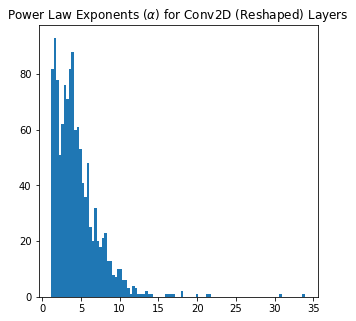

In [29]:
plt.hist(conv2d_alphas,bins=100);
plt.title(r"Power Law Exponents ($\alpha$) for Conv2D (Reshaped) Layers")
plt.show()

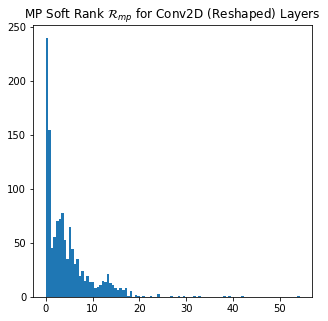

In [31]:
plt.hist(conv2d_ranks,bins=100);
plt.title(r"MP Soft Rank $\mathcal{R}_{mp}$ for Conv2D (Reshaped) Layers")
plt.show()